#Penggunaan Machine Learning untuk Memprediksi Deposito Pelanggan pada Bank di Portugal

Oleh Ridwan As-Sidiq, M Arief Widagdo

#Business Understanding

###Context

Sebuah bank di Portugal telah melakukan *marketing campaign* dengan menggunakan metode telemarketing kepada calon nasabahnya pada periode 2008-2010. Data yang telah dikumpulkan akan digunakan untuk bisa mendapatkan dan mengevaluasi efektivitas dari kampanye yang telah dijalankan. Hasil dari evaluasi ini dapat digunakan sebagai salah satu komponen dalam *Decision Support System* (DSS) pada tingkat manajerial untuk sampai pada keputusan yang memaksimalkan efektivitas dari kampanye selanjutnya dan mengevaluasi dari kampanye yang ada. Harapan dari output penelitian ini adalah campaign yang dapat memaksimalkan output sekaligus mengetahui apakah ada dampak yang tidak terlihat sebelumnya menggunakan metode tradisional non-ML



###Problem Statement

Proses telemarketing dapat memakan waktu dan sumberdaya manusia (*manpower*) yang signifikan jika tidak dilakukan dengan target yang efektif dan cara yang tepat. Di sisi lain, perusahaan juga akan mengalami potensi kehilangan income (*revenue lost*) jika salah mengidentifikasi profile nasabah. Penggunaan teknik Machine Learning dapat membantu perusahaan untuk mengevaluasi proses telemarketing sekaligus menjadi bahan pertimbangan untuk kampanya telemarketing yang akan datang

### Analytic Approach

Pada project ini, kami akan melakukan analisis data untuk mengidentifikasi pola–pola yang membedakan nasabah yang berpotensi membuka deposito dengan yang tidak. Analisis dilakukan berdasarkan profil nasabah.

Setelah pola teridentifikasi, kami akan membangun sebuah model klasifikasi berbasis machine learning yang mampu memprediksi tingkat probabilitas seorang nasabah termasuk kategori potensial deposito atau tidak.

Model ini diharapkan menjadi alat bantu bagi perusahaan dalam mendukung proses pengambilan keputusan, khususnya dalam:

- Menentukan target nasabah yang paling potensial,

- Mengoptimalkan strategi pemasaran,

- Meningkatkan efisiensi akuisisi deposito.

###Metode Evaluasi

|                              | **PREDIKSI**                                                         |                                                                   |
| ---------------------------- | -------------------------------------------------------------------- | ----------------------------------------------------------------- |
|                              | Tidak Potensial Deposito (0)                                         | Potensial Deposito (1)                                            |
| **AKTUAL**                   | **TRUE NEGATIVE (TN)**                                               | **FALSE POSITIVE (FP)**                                           |
| Tidak Potensial Deposito (0) | Model memprediksi nasabah **tidak potensial**, dan memang tidak      | Model memprediksi nasabah **potensial**, padahal sebenarnya tidak |
| **AKTUAL**                  | **FALSE NEGATIVE (FN)**      | **TRUE POSITIVE (TP)**                                               |                                                                   |
| Potensial Deposito (1)       | Model memprediksi nasabah **tidak potensial**, padahal sebenarnya ya | Model memprediksi nasabah **potensial**, dan memang ya            |


Type 1 Error (False Positive / FP)

- Konsekuensi: Bank menargetkan nasabah yang sebenarnya tidak potensial, sehingga biaya telemarketing, waktu, dan sumber daya menjadi sia-sia.

Type 2 Error (False Negative / FN)

- Konsekuensi: Bank melewatkan nasabah potensial, sehingga peluang revenue hilang.


Strategi Model
mengurangi biaya telemarketing (FP) sekaligus tidak melewatkan nasabah potensial (FN), untuk menyeimbankan keduanya F2 Score lebih relevan karena:
- Menekankan Recall lebih tinggi → menangkap sebanyak mungkin nasabah potensial akan tetapi
Tetap mempertahankan Precision → meminimalkan telemarketing sia-sia
- cara bekerja F2-sore -> F2 score memberikan perhatian 4× lebih besar kepada Recall dibanding Precision


**Rumus F2-Score**


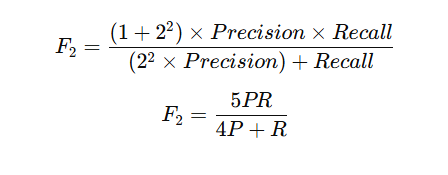

# Data Understanding


## Load Data

In [ ]:
import pandas as pd

data = pd.read_csv('bank-additional-full.csv', sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Info Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dalam dataset terdiri dari 41188 baris dan 21 kolom. Sebagian besar kolom memiliki tipe data yaitu "objek", antara lain kolom "job", "marital", "education", dan lain sebagainya. 5 kolom memiliki tipe data float64 yang berisi numerik atau angka-angka. Kolom "y" berupa kolom target yang akan dianalisis lebih lanjut.

## Info Type Data

In [ ]:
data_kategorik = data.select_dtypes(include='object').columns
data_kategorik

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
len(data_kategorik)

11

In [ ]:
data_numerik = data.select_dtypes(include='number').columns
data_numerik

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
len(data_numerik)

10

Data-bank-additional memiliki type data :


*   kategorik = 11
*   numerik = 10




## Deskripsi column

| No | Kolom          | Deskripsi                                                                                   |
| -- | -------------- | ------------------------------------------------------------------------------------------- |
| 1  | age            | Usia nasabah dalam tahun.                                                                   |
| 2  | job            | Pekerjaan nasabah (contoh: housemaid, admin, technician).                                   |
| 3  | marital        | Status perkawinan nasabah (married, single, divorced).                                      |
| 4  | education      | Tingkat pendidikan nasabah (basic.4y, high.school, university).                             |
| 5  | default        | Apakah nasabah memiliki kredit macet sebelumnya (yes/no)/unknown(Tidak ada data, bisa jadi belum pernah meminjam, bisa juga datanya tidak tercatat)                                   |
| 6  | housing        | Apakah nasabah memiliki pinjaman rumah (yes/no).                                            |
| 7  | loan           | Apakah nasabah memiliki pinjaman pribadi (yes/no).                                          |
| 8  | contact        | Cara kontak nasabah terakhir (cellular, telephone).                                         |
| 9  | month          | Bulan terakhir kontak dilakukan (may, jun, dll).                                            |
| 10 | day_of_week    | Hari dalam minggu terakhir kontak dilakukan (mon, tue, dll).                                |
| 11 | duration       | Durasi panggilan terakhir (dalam detik), kolom ini ada setelah melakukan panggilan dan setelah selesai taget diketahui.                                                    |
| 12 | campaign       | Jumlah kontak selama kampanye ini untuk nasabah ini.                                        |
| 13 | pdays          | Jumlah hari sejak kontak terakhir pada kampanye sebelumnya (999 jika belum pernah dikontak)dan(0 baru dihubungi hari yg sama). |
| 14 | previous       | Jumlah kontak sebelum kampanye ini untuk nasabah ini.                                       |
| 15 | poutcome       | Hasil kampanye sebelumnya (success, failure, nonexistent).                                  |
| 16 | emp.var.rate   | Variasi tingkat pekerjaan kuartal ekonomi.                                                  |
| 17 | cons.price.idx | Indeks harga konsumen (consumer price index).                                               |
| 18 | cons.conf.idx  | Indeks kepercayaan konsumen (consumer confidence index).                                    |
| 19 | euribor3m      | Suku bunga Euribor 3 bulan, mengacu ke Bank Sentral Eropa.                                                                 |
| 20 | nr.employed    | Jumlah karyawan pada bank atau perusahaan terkait, dihitung per kuartal.                                          |
| 21 | y              | Target: Apakah nasabah melakukan deposit jangka panjang (yes/no).                           |


## Data Aggregation


- Ini hanya untuk identifikasi awal untuk melihat value aggregation pada data numerik, hal ini dapat digunakan untuk melihat struktur data di awalan penelitian

In [ ]:
data[data_numerik].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Missing Value

In [ ]:
data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


Pada Dataset ini, sekilas terlihat tidak adanya missing values, akan tetapi jika melihat sumber data di Kaggle maka missing values yang dimaksud adalah Unknown.

- identifikasi value unknown(missing value)

In [ ]:
unknown_counts = (data == "unknown").sum()
unknown_percent = (unknown_counts / len(data)) * 100

unknown_df = unknown_counts.to_frame(name='unknown_count')
unknown_df['unknown_percent'] = unknown_percent
unknown_df.sort_values(by='unknown_count', ascending=False)




,unknown_count,unknown_percent
default,8597,20.872584
education,1731,4.202680
housing,990,2.403613
loan,990,2.403613
job,330,0.801204
marital,80,0.194231
age,0,0.000000
contact,0,0.000000
month,0,0.000000
day_of_week,0,0.000000


## Data Duplicate

In [ ]:
data.duplicated().sum()

np.int64(12)

# Data Cleaning

Selanjutnya adalah mengidentifikasi column yang memiliki value unknown 4 teratas pada 1 row

## Identifikasi 4 column yang memiliki value unknown pada 1 row

In [ ]:
unknown = ['education','default','housing','loan']

# Filter baris yang ketiga kolomnya 'unknown'
unknown_rows = data[(data[unknown[0]] == 'unknown') &
                    (data[unknown[1]] == 'unknown') &
                    (data[unknown[2]] == 'unknown') &
                    (data[unknown[3]] == 'unknown')]

unknown_rows


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
768,38,technician,married,unknown,unknown,unknown,unknown,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1949,34,blue-collar,married,unknown,unknown,unknown,unknown,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2006,57,blue-collar,married,unknown,unknown,unknown,unknown,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2723,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
4343,38,blue-collar,divorced,unknown,unknown,unknown,unknown,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
7329,42,blue-collar,married,unknown,unknown,unknown,unknown,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
8839,59,technician,married,unknown,unknown,unknown,unknown,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
10641,49,admin.,single,unknown,unknown,unknown,unknown,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
10923,51,blue-collar,divorced,unknown,unknown,unknown,unknown,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
11047,57,blue-collar,divorced,unknown,unknown,unknown,unknown,telephone,jun,wed,...,8,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


Baris "Unknown" terdefinisi sebagai nilai yang hilang. Baris "Unknown" terdapat di beberapa kolom dalam dataset. Baris tersebut juga terletak pada empat kolom dataset yaitu "education", "default", "housing", dan "loan". 18 baris di atas dapat dihapus dikarenakan data yang tersedia kurang jelas dan value target/y no keseluruhannya

## Delete Data

- data duplicate

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

- Menghapus data nasabah yang memiliki value "UNKNOWN" pada empat kolom yaitu  "education", "default", "housing", dan "loan"

In [ ]:
data.drop(unknown_rows.index, inplace=True) # fungsi indek itu untuk mengembalikan list dari unknown rows

- mengecek ulang data yang memilki value unknown pada keempat rows

In [ ]:
unknown = ['education','default','housing','loan']

# Filter baris yang ke4 kolomnya 'unknown'
unknown_rows = data[(data[unknown[0]] == 'unknown') &
                    (data[unknown[1]] == 'unknown') &
                    (data[unknown[2]] == 'unknown') &
                    (data[unknown[3]] == 'unknown')]

unknown_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


## Drop Column Duration (hanya untuk machine learning)

- alasan kolom duration dihapus

Duration kontak terakhir, dalam hitungan detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target output (misalnya, jika Duration=0 maka hasilnya biasanya y = 'no'). Namun, **Duration panggilan ini tidak diketahui** sebelum panggilan dilakukan. Juga, **setelah panggilan selesai, hasil y sebenarnya sudah diketahui**. Karena itu, fitur ini hanya boleh digunakan untuk keperluan benchmark (perbandingan performa model) dan harus dibuang jika tujuan Anda adalah membuat model prediksi yang realistis.


link referensinya : https://archive.ics.uci.edu/dataset/222/bank+marketing

- Korelasi duration dan y

In [ ]:
import numpy as np

data_ml = data.copy() # supaya data original pada column target tidak berubah
data_ml['y'] = data_ml['y'].map({'yes': 1, 'no': 0}) # mengubah column y menjadi numerik  untuk melihat persebaran fitur terhadap target

corr = data_ml[['duration', 'y']].corr()
corr


,duration,y
duration,1.000000,0.405356
y,0.405356,1.000000


| Rentang Korelasi | Kategori Kekuatan      | Penjelasan Singkat                                                                                                              | Referensi Umum                                           |
| ---------------- | ---------------------- | ------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------- |
| 0.00 – 0.10      | Sangat lemah           | Hampir tidak ada hubungan                                                                                                       | Cohen (1988)                                             |
| 0.10 – 0.20      | Lemah                  | Hubungan kecil, tidak signifikan secara praktis                                                                                 | Cohen (1988)                                             |
| 0.20 – 0.40      | Sedang                 | Ada hubungan, tetapi tidak dominan                                                                                              | Cohen (1988), Figueiredo (2019)                          |
| > 0.40           | **Kuat / Sangat Kuat** | **Indikasi kuat fitur sangat berhubungan dengan target**, bisa mengarah ke *data leakage* jika variabel berasal dari masa depan | Aggarwal (2015, Data Mining), *Kaggle ML Best Practices* |


insight :    
kita bisa melihat bahwa kolom duration memiliki korelasi > 0.40 terhadap target y, maka Sangat mungkin terjadi data leakage

Karena variabel duration pada dataset Bank Marketing memang baru diketahui setelah nasabah memutuskan untuk deposit atau tidak. Artinya variabel ini membocorkan informasi masa depan (post-outcome feature), sehingga model menjadi terlalu akurat secara tidak realistis.

Referensi :
- UCI Machine Learning Repository – Bank Marketing Dataset
Dokumentasi menyebutkan:
“The duration attribute highly affects the output target, but this feature is not known before the call is performed.”
(Sumber resmi dataset Bank Marketing)

- Moro et al., 2014 — "A Data-Driven Approach to Predict the Success of Bank Telemarketing"
Paper aslinya menyebutkan secara eksplisit:
“Duration should be discarded for predictive modeling because it is a strong predictor but only available after the call.”

## Save data clean untuk EDA dan Dashboard

- Untuk EDA

In [ ]:
data.reset_index(drop=True, inplace=True)
data.to_csv('data_eda.csv', index=False)

Data EDA akan digunakan selanjutnya untuk diolah lebih lanjut

- Untuk Dashboard

In [ ]:
data.reset_index(drop=True, inplace=True)
data.to_csv('data_dashboard.csv', index=False , sep=';')

Data EDA untuk dashboard selanjutnya akan digunakan sebagai data mentah yang ditampilkan pada Tableu

# Explorasi Data

## Distribusi Data

- Grafik distribusi (column numerik)

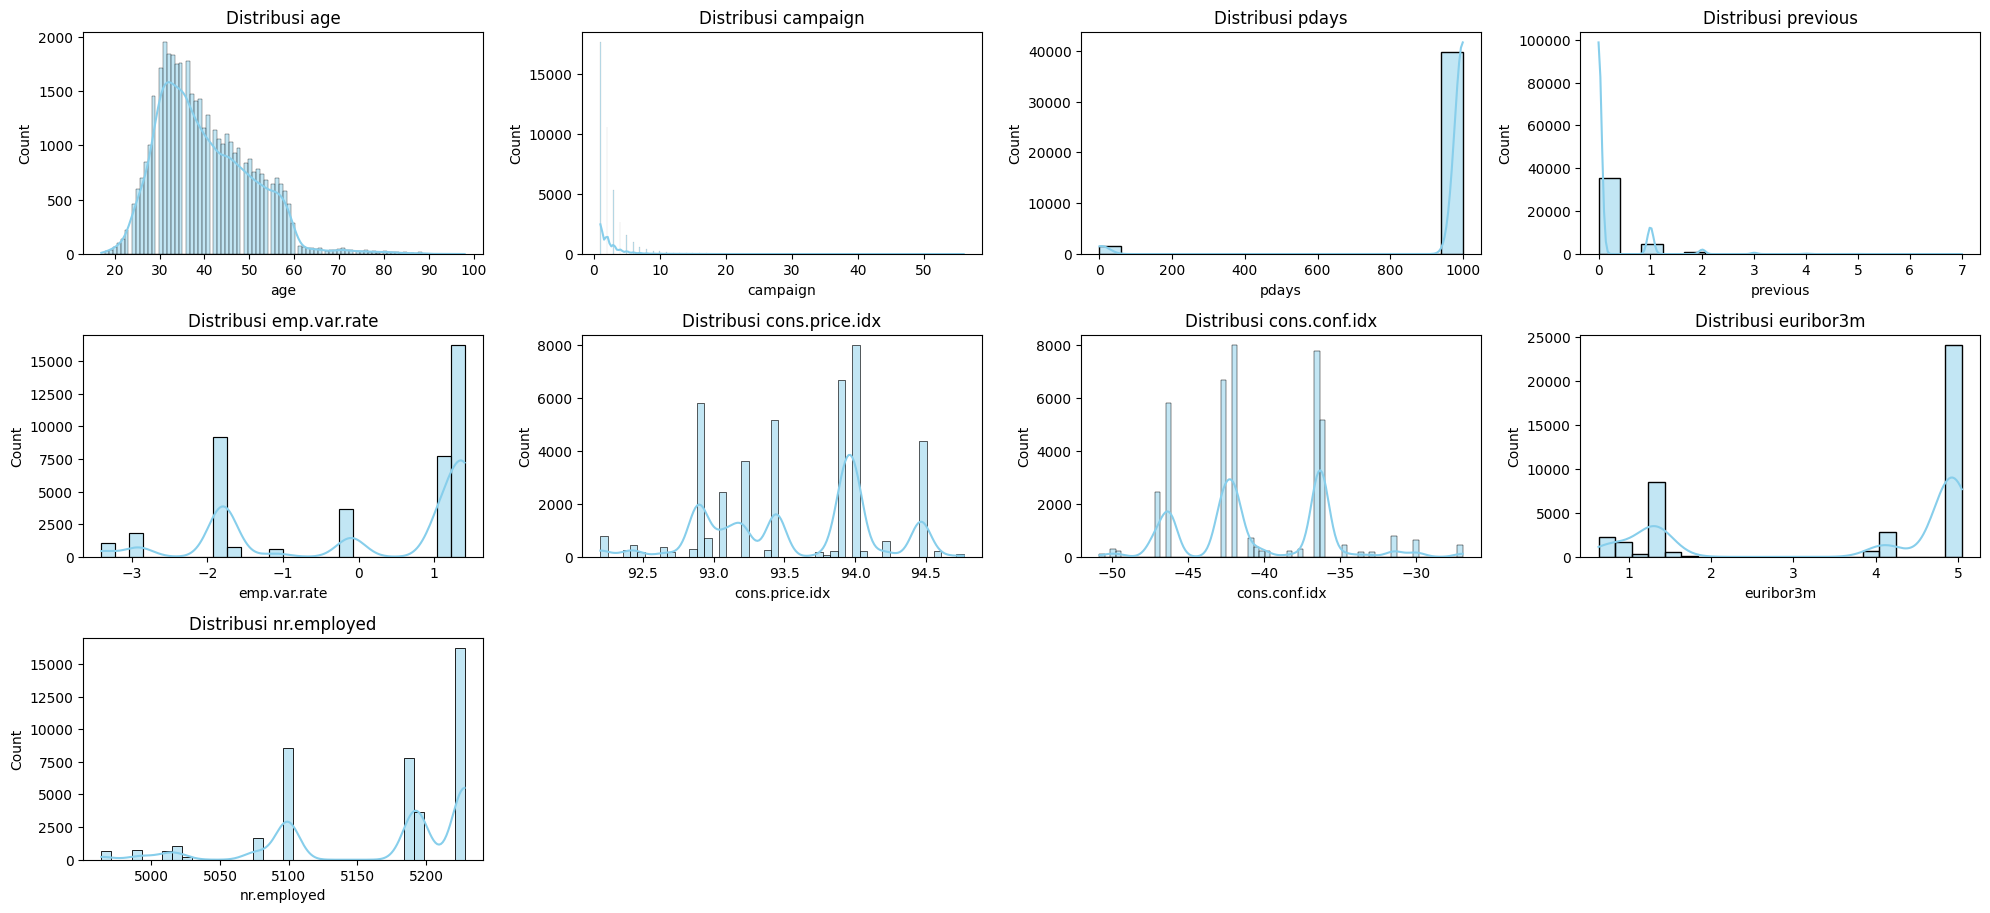

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_eda = pd.read_csv('data_eda.csv')

cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot distribusi dan outlier
plt.figure(figsize=(20, 30))

for i, col in enumerate(cols):
    plt.subplot(10, 4, i+1)
    sns.histplot(data_eda[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')


plt.tight_layout()
plt.show()

- Uji normalitas Data (column numerik). Kami menggunakan uji Shapiro-Wilk karena data yang ada berjumlah lebih dari 5000 data.

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd

data_sample = data_eda.sample(5000)

# Uji Shapiro-Wilk
for col in data_sample[cols].columns:
    stat, p = stats.shapiro(data_sample[cols][col])
    print(f"Kolom: {col}")
    print(f"  Shapiro-Wilk Test Statistic: {stat}")
    print(f"  Shapiro-Wilk p-value: {p}")
    if p > 0.05:
        print(f"{col} memiliki distribusi normal.\n")
    else:
        print(f"{col} tidak memiliki distribusi normal.\n")

Kolom: age
  Shapiro-Wilk Test Statistic: 0.9582957223065007
  Shapiro-Wilk p-value: 1.2428971306041365e-35
age tidak memiliki distribusi normal.

Kolom: campaign
  Shapiro-Wilk Test Statistic: 0.5230715508680377
  Shapiro-Wilk p-value: 3.939754633070645e-79
campaign tidak memiliki distribusi normal.

Kolom: pdays
  Shapiro-Wilk Test Statistic: 0.1762069299370187
  Shapiro-Wilk p-value: 2.5681931117160834e-91
pdays tidak memiliki distribusi normal.

Kolom: previous
  Shapiro-Wilk Test Statistic: 0.3933347726848818
  Shapiro-Wilk p-value: 2.190907796221387e-84
previous tidak memiliki distribusi normal.

Kolom: emp.var.rate
  Shapiro-Wilk Test Statistic: 0.7605011487855309
  Shapiro-Wilk p-value: 4.83805452513867e-65
emp.var.rate tidak memiliki distribusi normal.

Kolom: cons.price.idx
  Shapiro-Wilk Test Statistic: 0.9333438291100242
  Shapiro-Wilk p-value: 1.2493061528975952e-42
cons.price.idx tidak memiliki distribusi normal.

Kolom: cons.conf.idx
  Shapiro-Wilk Test Statistic: 0.9233

Berdasarkan uji Shapiro-Wilk maka terlihat bahwa distribusi dalam dataset yaitu distribusi tidak normal.

- Persebaran Distribusi fitur(column numerik) terhadap target(column y)

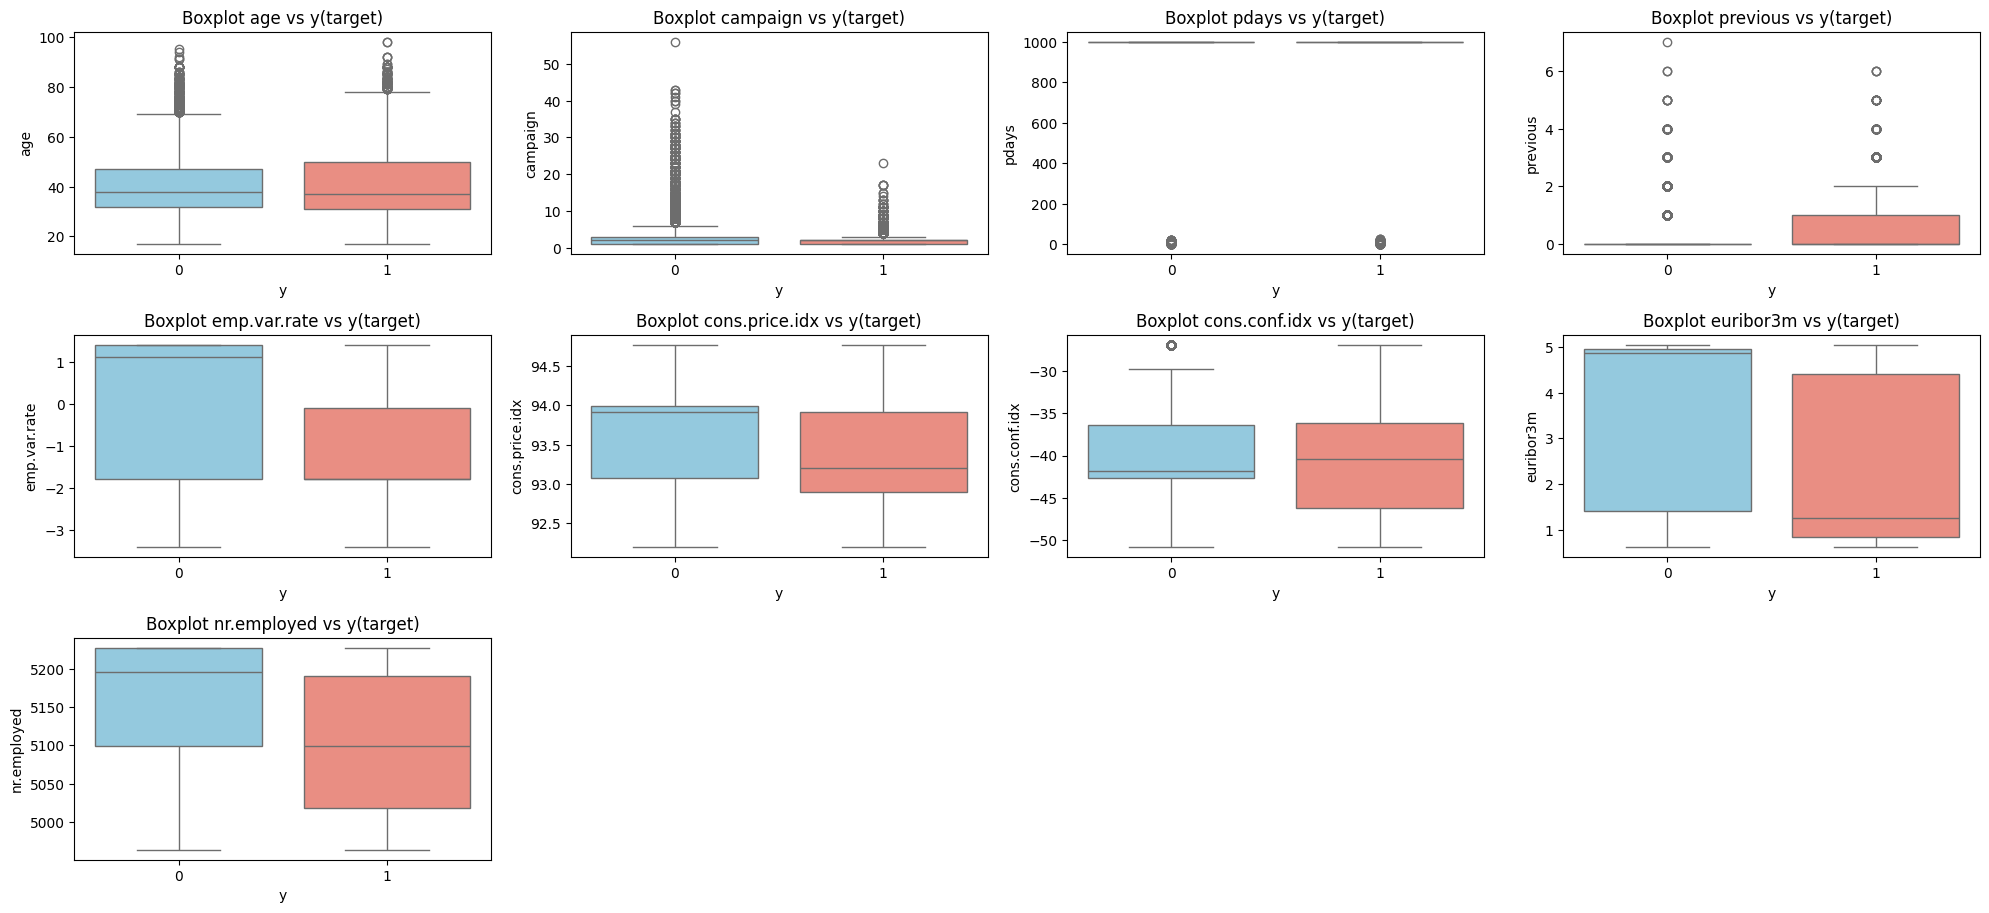

In [ ]:
data_eda_copy = data_eda.copy() # supaya data original pada column target tidak berubah
data_eda_copy['y'] = data_eda_copy['y'].map({'yes': 1, 'no': 0}) # mengubah column y menjadi numerik  untuk melihat persebaran fitur terhadap target

plt.figure(figsize=(20, 30))

for i, col in enumerate(cols):
    plt.subplot(10, 4, i+1)
    sns.boxplot(data=data_eda_copy, x='y', y=col, hue='y',
                palette={0: 'skyblue', 1: 'salmon'}, dodge=False, legend=False)
    plt.title(f'Boxplot {col} vs y(target)')

plt.tight_layout()
plt.show()


Dataset memiliki distribusi yang tidak tersebar merata, hal ini wajar karena persebaran efektivitas sebuah kampanye jarang mengikuti distribusi normal. Kondisi ini normal terjadi di data kredit, kesehatan dan juga asuransi. Dalam menggunakan Machine Learning, perlu ada perlakuan khusus untuk dapat menggunakan dataset ini agar ketimpangan distribusi tidak memengaruhi hasil akhir. Untuk menggambarkan ketimpangan distribusi, di fitur target, hanya 12% nasabah yang melakukan deposit sedangkan sisa nya tidak melakukan deposit lebih lanjut. Bentuk dari distribusi data ini penting diingat saat melakukan perlakuan terhadap resampling karena tanpa penanganan yang baik, bisa muncul variasi yang berujung pada berkurangnya akurasi model atau bertambahnya bias model. Dalam analisis statistika pun, ketidakseimbangan data akan tidak terlalu terlihat secara mendetail sedangkan dalam penggunaan Machine Learning, ketidakseimbangan data dapat diakali dengan teknik yang tepat atau dengan pilihan model

- distribusi y (target)

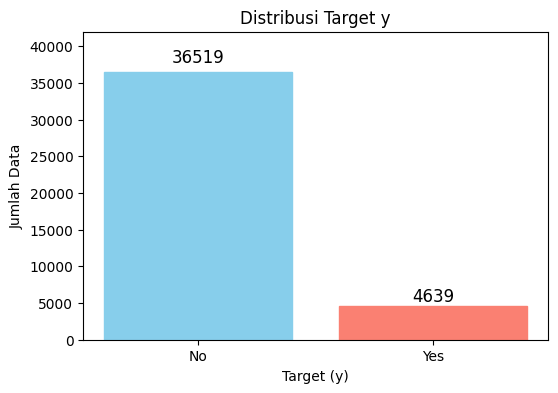

In [ ]:
import matplotlib.pyplot as plt

counts = data_eda_copy['y'].value_counts()

plt.figure(figsize=(6,4))

bars = plt.bar(['No', 'Yes'], counts.values)

plt.title("Distribusi Target y")
plt.xlabel("Target (y)")
plt.ylabel("Jumlah Data")

# Warna bar
bars[0].set_color('skyblue')
bars[1].set_color('salmon')

# Menampilkan angka di atas bar
for i, v in enumerate(counts.values):
    plt.text(i, v + (v * 0.02),     # geser 2% dari tinggi bar
             str(v),
             ha='center',
             va='bottom',
             fontsize=12)

plt.ylim(0, max(counts.values) * 1.15)  # beri ruang atas agar teks tidak menabrak
plt.show()


Berdasarkan hasil dari grafik diatas, distribusi target:

y = No → 36.519 data

y = Yes → 4.639 data

Artinya, proporsi kelas adalah:

88,7% kelas No

11,3% kelas Yes

Ini menunjukkan bahwa dataset sangat tidak seimbang (highly imbalanced), di mana kelas mayoritas mendominasi. maka diperlukannya penangann imbalance saat machine learning

## Outlier Data

In [ ]:
def check_outlier(data_eda, cols):
    hasil_outlier = {}
    for col in cols:
        q1 = data_eda[col].quantile(0.25)
        q3 = data_eda[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = data_eda[(data_eda[col] < lower_bound) | (data_eda[col] > upper_bound)]
        hasil_outlier[col] = {
            'jumlah_outliers' : outliers.shape[0],
            'Persentase Outlier': (outliers.shape[0] / data_eda.shape[0]) * 100
        }
    return pd.DataFrame(hasil_outlier).T
check_outlier(data_eda, cols).sort_values(by='Persentase Outlier', ascending=False)

,jumlah_outliers,Persentase Outlier
previous,5625.0,13.666845
campaign,2405.0,5.843335
pdays,1515.0,3.680937
age,468.0,1.137081
cons.conf.idx,446.0,1.083629
emp.var.rate,0.0,0.000000
cons.price.idx,0.0,0.000000
euribor3m,0.0,0.000000
nr.employed,0.0,0.000000


- grafik boxplot outlier

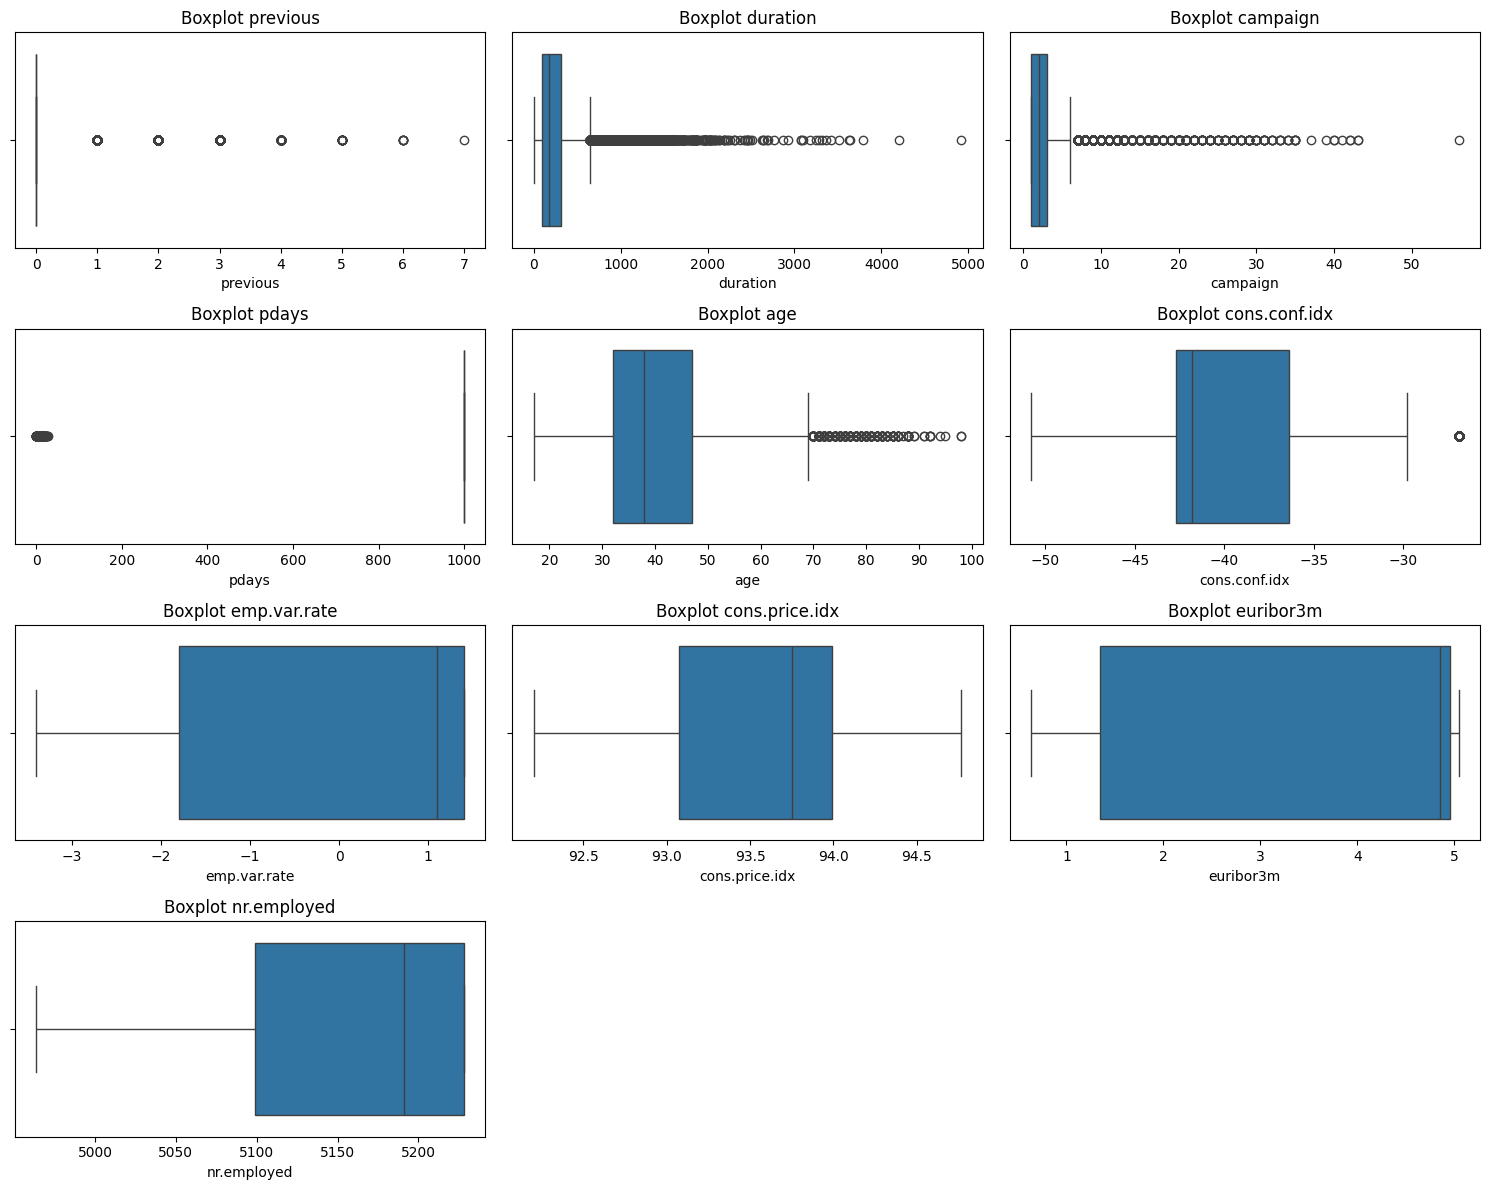

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_boxplot_grid(data_eda, cols, n_cols=3):
    n_rows = math.ceil(len(cols) / n_cols)  # hitung jumlah baris
    plt.figure(figsize=(5 * n_cols, 3 * n_rows))  # ukuran figure menyesuaikan kolom dan baris

    for i, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=data_eda[col])
        plt.title(f'Boxplot {col}')

    plt.tight_layout()
    plt.show()

cols = ['previous','duration','campaign','pdays','age','cons.conf.idx','emp.var.rate','cons.price.idx','euribor3m','nr.employed']
plot_boxplot_grid(data_eda, cols, n_cols=3)


## Korelasi Fitur(numerik) terhadap target


Generatng Boxplots for: 1. Macro-Economic Indicators (External)


/tmp/ipython-input-708781908.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-708781908.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-708781908.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-708781908.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-708781908.py:33: FutureWarning: 

Passing `pa

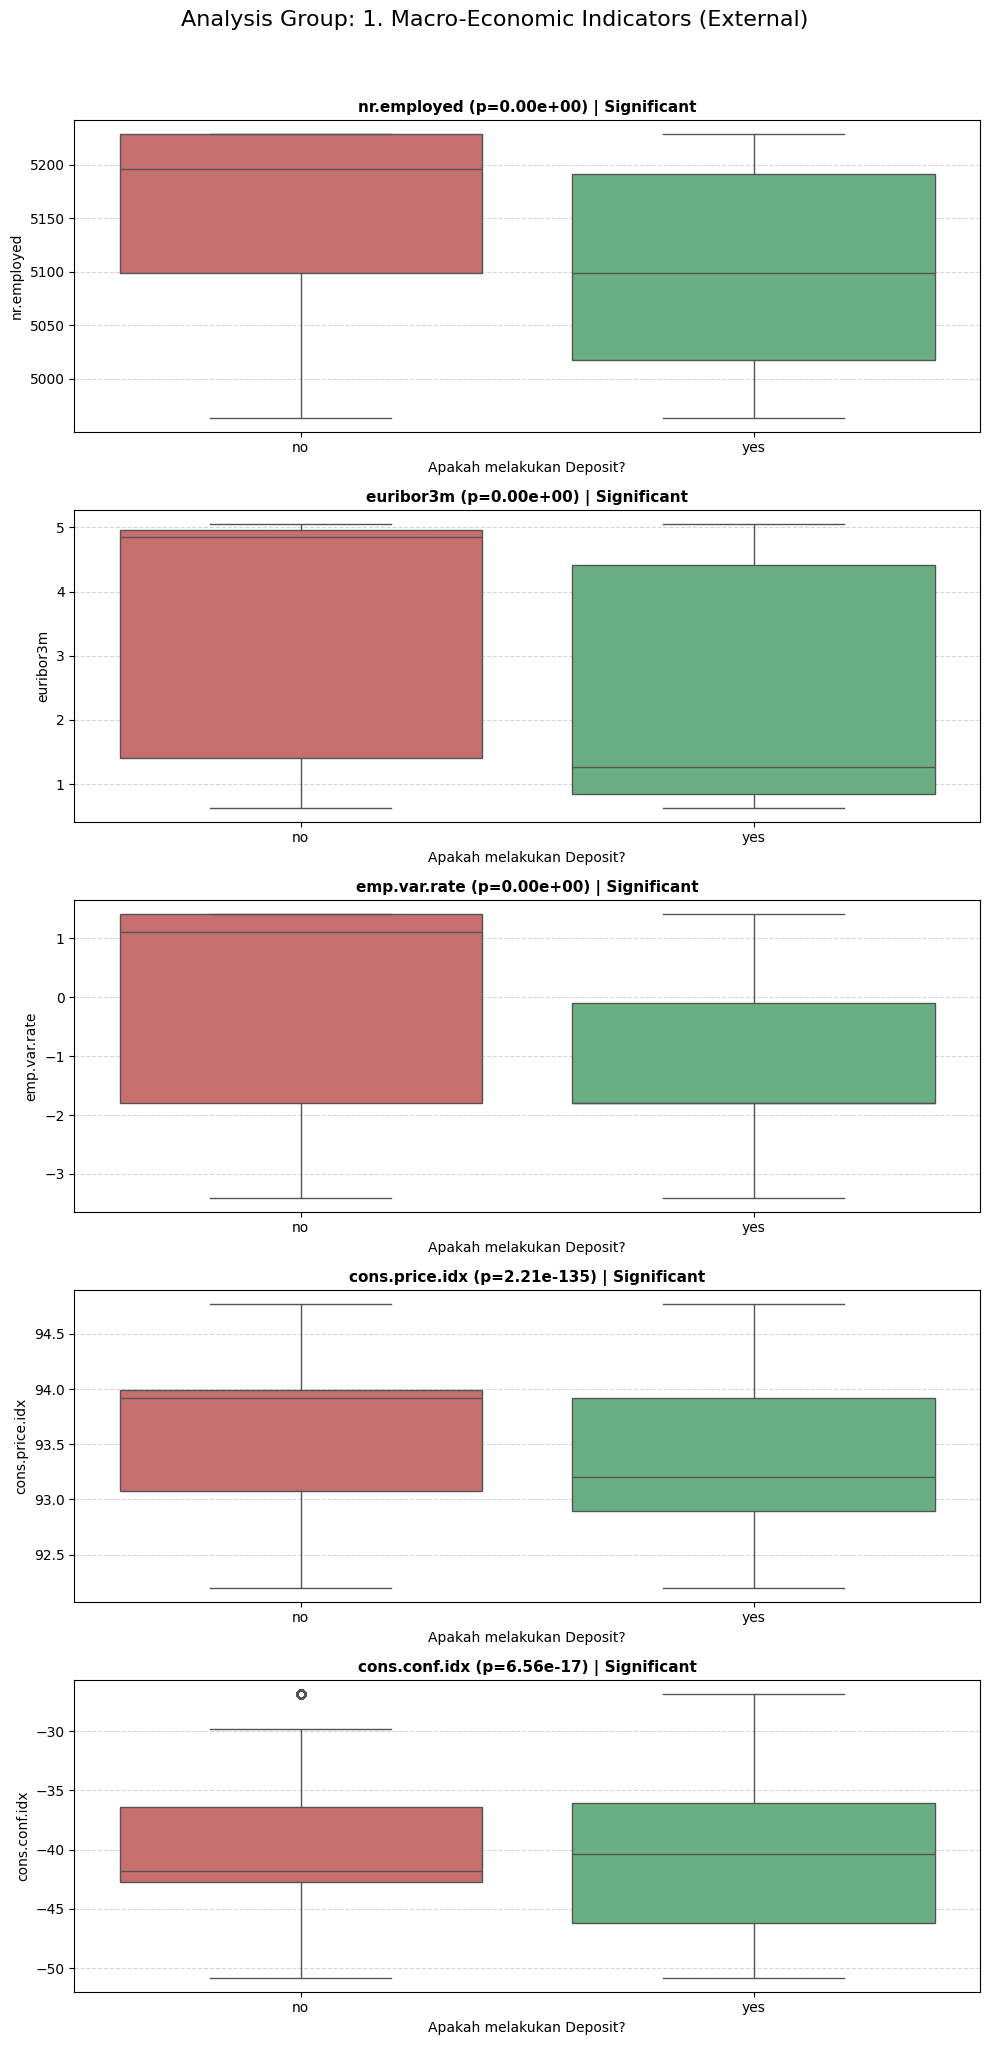


Generatng Boxplots for: 2. Campaign History (Behavioral)


/tmp/ipython-input-708781908.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-708781908.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-708781908.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


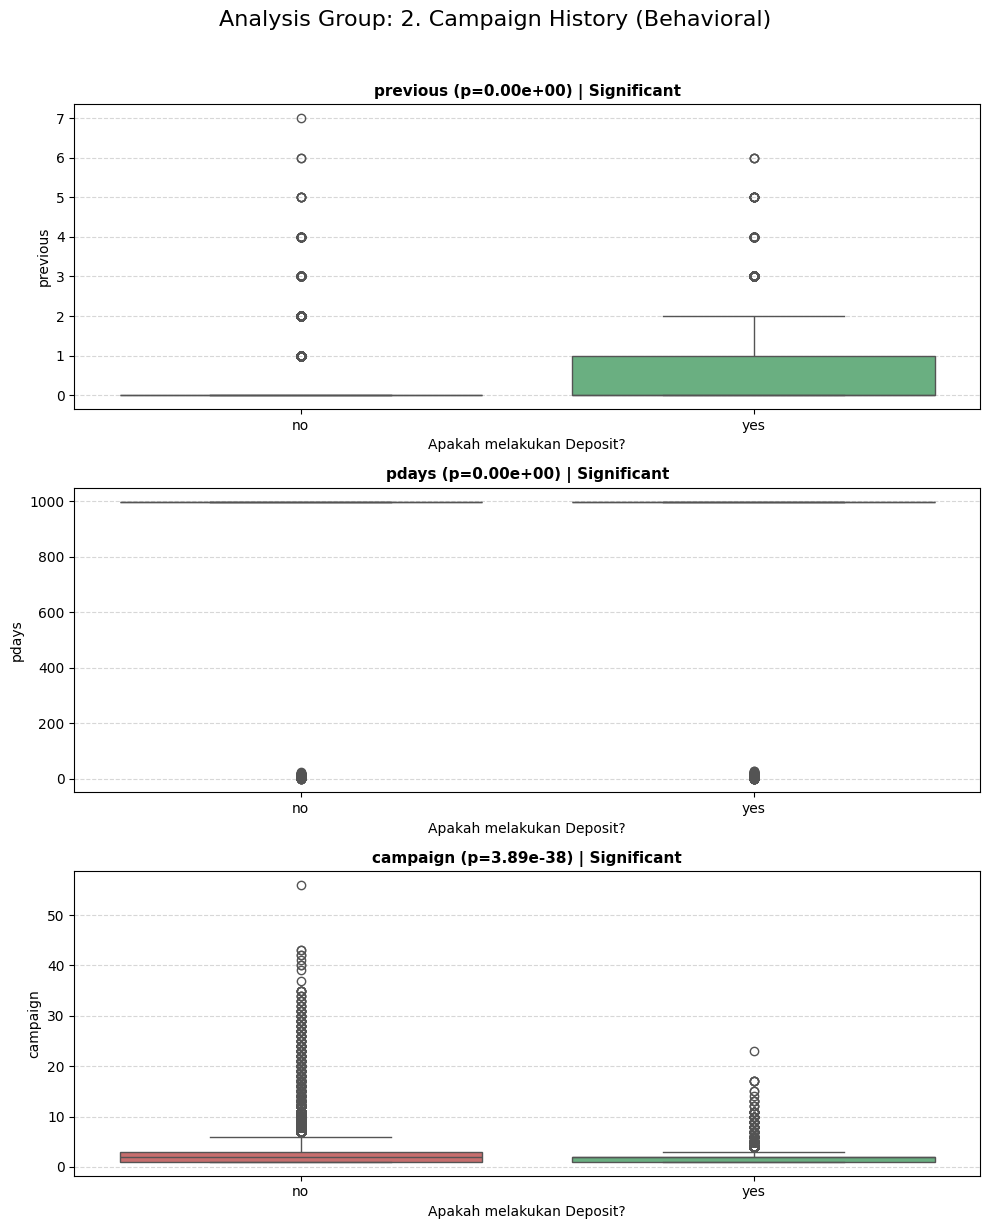


Generatng Boxplots for: 3. Customer Demographics


/tmp/ipython-input-708781908.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


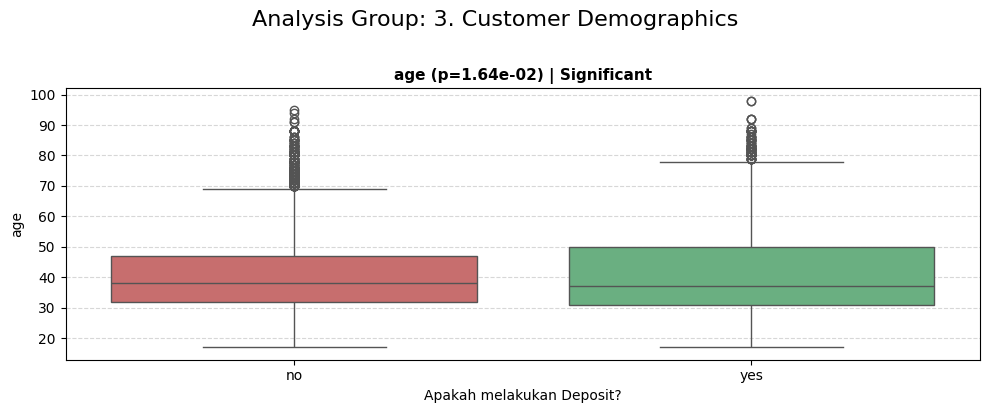

In [ ]:
target = 'y'
yes_value = 'yes' if 'yes' in data_eda[target].unique() else 1
no_value  = 'no'  if 'no'  in data_eda[target].unique() else 0

# Menggunakan domain knowledge untuk menkategorikan variabel numerik nya
categories = {
    "1. Macro-Economic Indicators (External)": ['nr.employed', 'euribor3m', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'],
    "2. Campaign History (Behavioral)": ['previous', 'pdays', 'campaign'],
    "3. Customer Demographics": ['age']
}

#Loop per kateogri dan plot
for category_name, features in categories.items():

    # Filter data di data_eda
    valid_features = [f for f in features if f in data_eda.columns]

    if not valid_features:
        continue

    print(f"\nGeneratng Boxplots for: {category_name}")

    # Buat figure
    fig, axes = plt.subplots(nrows=len(valid_features), ncols=1, figsize=(10, 4 * len(valid_features)))

    # Handle kalau cuma ada 1 axis
    if len(valid_features) == 1:
        axes = [axes]

    # Plot tiap fitur
    for i, col in enumerate(valid_features):
        # Boxplot
        sns.boxplot(
            data=data_eda,
            x=target,
            y=col,
            ax=axes[i],
            palette={'no': '#d65f5f', 'yes': '#5fba7d'} # warna merah/hijau
        )

        # Numerik maka gunakan Mann-Whitney tes
        group_yes = data_eda[data_eda[target] == yes_value][col]
        group_no = data_eda[data_eda[target] == no_value][col]
        u_stat, p_val = stats.mannwhitneyu(group_yes, group_no)

        # Tambahkan P-Value
        significance = "Significant" if p_val < 0.05 else "Not Significant"
        axes[i].set_title(f"{col} (p={p_val:.2e}) | {significance}", fontsize=11, fontweight='bold')
        axes[i].set_xlabel("Apakah melakukan Deposit?")
        axes[i].grid(axis='y', linestyle='--', alpha=0.5)

    # Rapihin
    plt.suptitle(f"Analysis Group: {category_name}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

###**Analisis lanjutan**

Setelah melakukan analisis menggunakan Mann-Whitney, maka didapatkan hasil berikut:


**Hubungan Euribor dan target serta krisis Ekonomi di Eropa pasca 2008**

Salah satu hubungan yang terlihat setelah melakukan analisis korelasi numerik adalah hubungan negatif antara euribor3m dengan target variable, hal ini menunjukan angka negatif, artinya semakin tinggi nilai Euribor maka justru semakin sedikit orang yang melakukan deposit, hal ini terdengar *counterintuitive* tetapi hal ini dapat dijelaskan dengan konteks sosial ekonomi pada tahun 2008 atau paska krisis ekonomi eurozone. Pada periode ini, masyarakat cenderung ingin memiliki *saving* terlepas dari besarnya jumlah deposito yang ditawarkan dan diacukan oleh bank sentral Eropa. Hal ini dikarenakan sentimen masyarakat yang memiliki kekhawatiran tinggi setelah krisis di tahun 2008.
Hal ini akan terlihat sebagai nilai negatif saat melakukan data analisis sederhana tanpa menggunakan Machine Learning tapi akan bisa ditangkap jika menggunakan pola Machine Learning.

**Hubungan Ekonomi Makro dengan Deposit Nasabah**

Beberapa variable lain menunjukan korelasi yang bervariasi, sebagai contoh fitur ekonomi makro (euribor, employment, emp var rate) juga menunjukan korelasi negatif, hal ini menunjukan pola yang mirip dengan Euribor yang menunjukan bahwa semakin buruk performa ekonomi makro maka nilai target variable atau kemungkinan nasabah melakukan deposito juga akan semakin kecil. Perlu dilakukan analisis Machine Learning lanjutan untuk mendapatkan interaksi antara 3 fitur ini.

**Jarak antara kontak terakhir dan Deposito Nasabah**

Dari nilai negatif antara p.days dan target variabel maka dapat disimpulkan juga bahwa semakin jauh jarak antara kontak terakhir dengan nasabah makan kemungkinan nasabah melakukan deposito juga akan semakin kecil. Hal ini sesuai dengan teori psikologis dan dapat menentukan **Golden Period** dimana seorang nasabah dapat dijadikan target kampanye untuk meningkatkan kemungkinan melakukan deposito



In [ ]:
data_eda_copy # untuk mengecek apakah column target benar sudah dirubah ke numerik

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41153,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41154,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41155,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41156,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Dataset terbaru dengan 41176 baris dan 22 kolom. Pengurangan baris dari nilai "Unknown" yang terletak pada empat kolom ("education", "default", "housing", dan "loan"). Kolom terbaru yaitu mendefinisikan kolom target "y", yaitu "0" sebagai "no" dan "1" sebagai "yes".

##EDA untuk data Kategorik

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#Setup
target = 'y'

# Identifikasi var kategorik kecuali target
data_kategorik = data_eda.select_dtypes(include=['object']).columns.tolist()
if target in data_kategorik:
    data_kategorik.remove(target)

#hitung chi-square
chi2_results = []

for feature in data_kategorik:
    # Buat tabel
    contingency_table = pd.crosstab(data_eda[feature], data_eda[target])

    # Jalankan test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Simpan hasil
    chi2_results.append({
        'Feature': feature,
        'Chi2_Stat': chi2,
        'P_Value': p,
        'Degrees_of_Freedom': dof
    })

# format table
df_chi2 = pd.DataFrame(chi2_results)

# Urutkan berdasarkan hasil chi-square
df_chi2 = df_chi2.sort_values(by='Chi2_Stat', ascending=False).reset_index(drop=True)

# Apakah signifikan?
df_chi2['Significance'] = df_chi2['P_Value'].apply(lambda x: 'Significant' if x < 0.05 else 'Not Significant')

# Tampilkan tabel
print("Chi-Square Ranking Table")
print(df_chi2)

Chi-Square Ranking Table
       Feature    Chi2_Stat        P_Value  Degrees_of_Freedom  \
0     poutcome  4227.648290   0.000000e+00                   2   
1        month  3101.030880   0.000000e+00                   9   
2          job   960.523747  5.981264e-199                  11   
3      contact   861.288456  2.555354e-189                   1   
4      default   404.594429   1.391349e-88                   2   
5    education   194.317929   1.831182e-38                   7   
6      marital   122.680769   2.041905e-26                   3   
7  day_of_week    26.043846   3.100690e-05                   4   
8      housing     5.595855   6.093622e-02                   2   
9         loan     0.954769   6.204039e-01                   2   

      Significance  
0      Significant  
1      Significant  
2      Significant  
3      Significant  
4      Significant  
5      Significant  
6      Significant  
7      Significant  
8  Not Significant  
9  Not Significant  


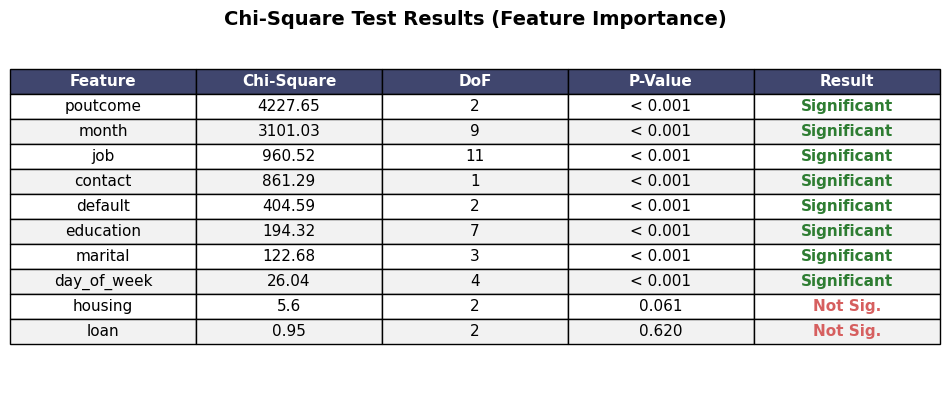

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#ambil data dari atas
data = {
    'Feature': ['poutcome', 'month', 'job', 'contact', 'default', 'education', 'marital', 'day_of_week', 'housing', 'loan'],
    'Chi2_Stat': [4227.65, 3101.03, 960.52, 861.29, 404.59, 194.32, 122.68, 26.04, 5.60, 0.95],
    'P_Value': [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.00003, 0.0609, 0.6204],
    'Degrees_of_Freedom': [2, 9, 11, 1, 2, 7, 3, 4, 2, 2]
}

df_table = pd.DataFrame(data)

# Ambil significant
df_table['Result'] = df_table['P_Value'].apply(lambda x: 'Significant' if x < 0.05 else 'Not Sig.')

# Benerin formatting
df_table['P_Value_Text'] = df_table['P_Value'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')

# Atur nama kolom dan baris
final_view = df_table[['Feature', 'Chi2_Stat', 'Degrees_of_Freedom', 'P_Value_Text', 'Result']]
final_view.columns = ['Feature', 'Chi-Square', 'DoF', 'P-Value', 'Result']

#Plot tablenya
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')

# Buat tabelnya
table = ax.table(cellText=final_view.values,
                 colLabels=final_view.columns,
                 cellLoc='center',
                 loc='center')

#Atur font dan wanra
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.5)

# Atur baris dan kolom
for (row, col), cell in table.get_celld().items():
    if row == 0:
        # Header Style
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e') # Dark Blue Header
    else:
        # Row Style
        if row % 2 == 0:
            cell.set_facecolor('#f2f2f2') # Alternating grey rows

        # Highlight not significant warna merah
        if col == 4 and final_view.iloc[row-1, 4] == 'Not Sig.':
            cell.set_text_props(color='#d65f5f', weight='bold')
        # Highlight "Significant" warna hijau
        elif col == 4:
            cell.set_text_props(color='#2E7D32', weight='bold')

plt.title("Chi-Square Test Results (Feature Importance)", fontweight='bold', fontsize=14, y=0.95)
plt.show()

Calculating feature importance (Cramer's V)...

--- Feature Importance Ranking ---
       Feature  Cramers_V
0     poutcome   0.320424
1        month   0.274094
2          job   0.151891
3      contact   0.144577
4      default   0.098904
5    education   0.067463
6      marital   0.053925
7  day_of_week   0.023143
8      housing   0.009347
9         loan   0.000000

Generating plots for: ['poutcome', 'month', 'job', 'contact']...


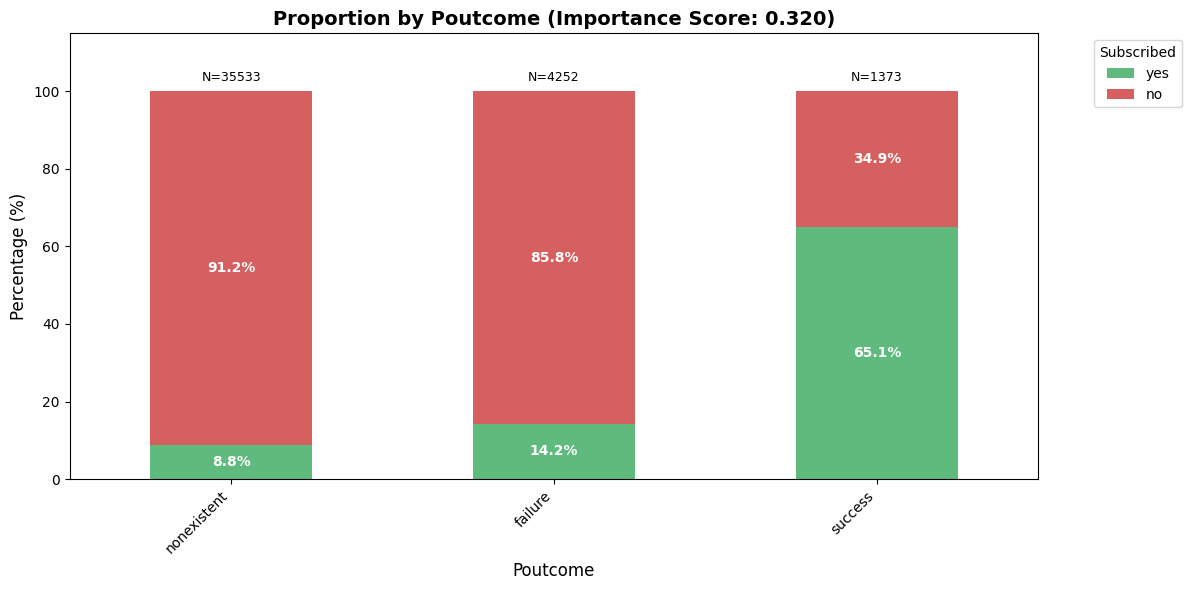

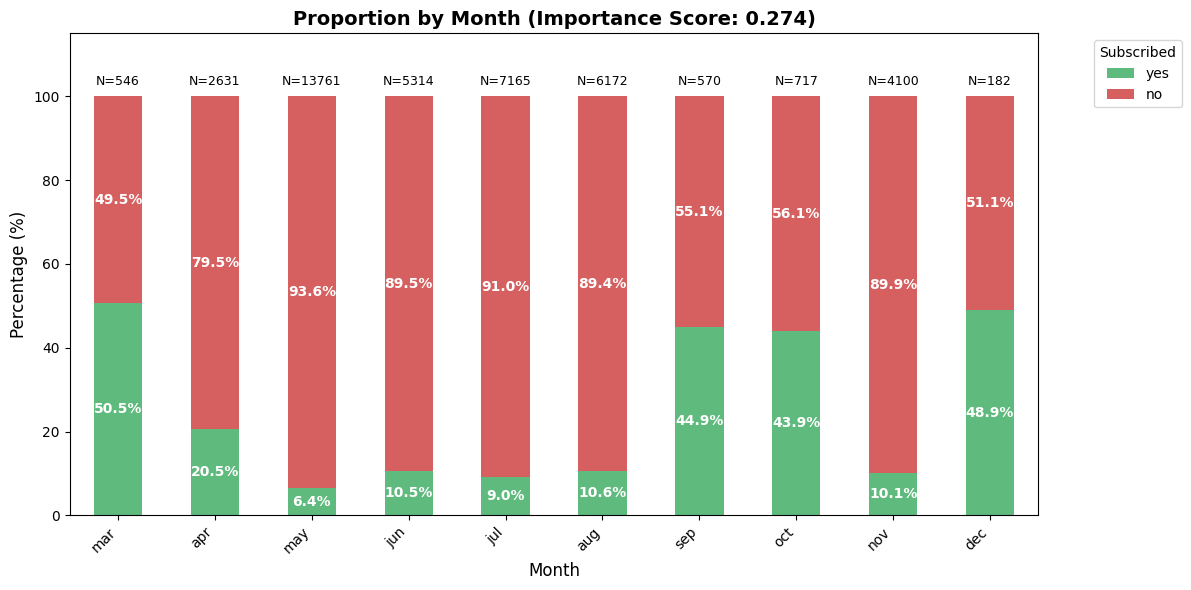

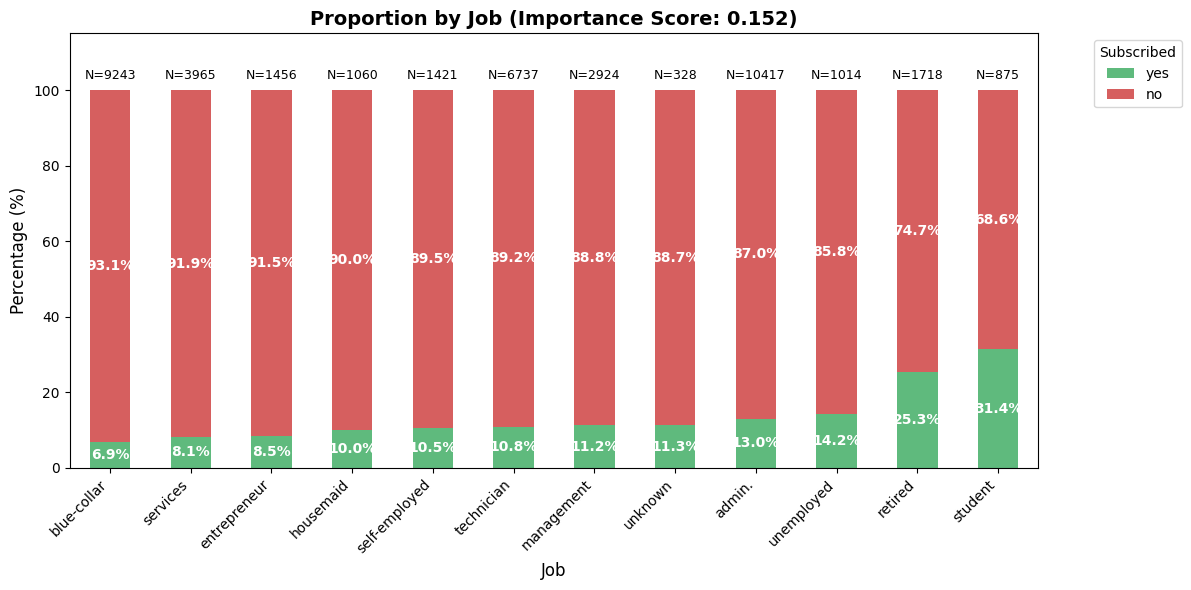

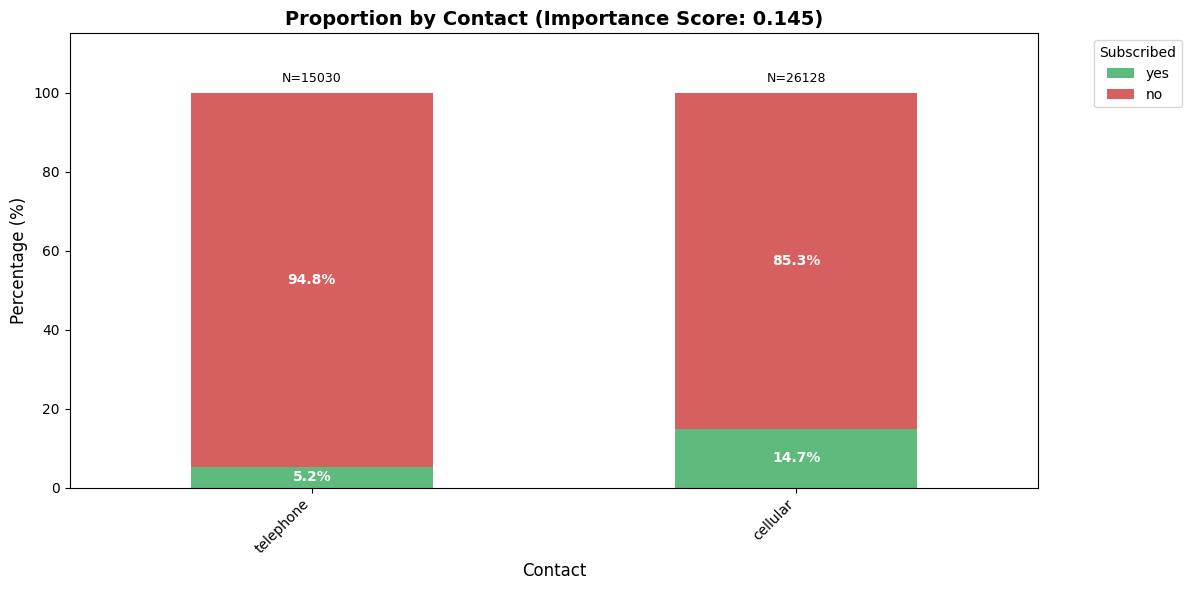

In [ ]:
#Bikin untuk Cramer's V
target = 'y'

# identifikasi kolom kategorik
data_kategorik = data_eda.select_dtypes(include=['object']).columns.tolist()
if target in data_kategorik:
    data_kategorik.remove(target)

# buat fungsi Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    with np.errstate(divide='ignore', invalid='ignore'):
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return result if not np.isnan(result) else 0

# Urutkan
print("Calculating feature importance (Cramer's V)...")
ranking_data = []
for feature in data_kategorik:
    score = cramers_v(data_eda[feature], data_eda[target])
    ranking_data.append({'Feature': feature, 'Cramers_V': score})

df_ranking = pd.DataFrame(ranking_data)
df_ranking = df_ranking.sort_values(by='Cramers_V', ascending=False).reset_index(drop=True)

print("\n--- Feature Importance Ranking ---")
print(df_ranking)

#bikin loop untuk visualisasi
TOP_N = 4
top_features = df_ranking['Feature'].head(TOP_N).tolist()

print(f"\nGenerating plots for: {top_features}...")

for feature in top_features:
    # Bikin contingency tabel
    contingency_table = pd.crosstab(data_eda[feature], data_eda[target])
    crosstab_norm = pd.crosstab(data_eda[feature], data_eda[target], normalize='index') * 100

    # crosstab dan reindexing
    crosstab_norm = crosstab_norm.reindex(columns=['yes', 'no'])

    # Logic mengurutkan
    if feature == 'month':
        month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        existing_months = [m for m in month_order if m in contingency_table.index]
        contingency_table = contingency_table.loc[existing_months]
        crosstab_norm = crosstab_norm.loc[existing_months]
    else:
         # Urutkan dengan yes
         crosstab_norm = crosstab_norm.sort_values(by='yes', ascending=True)
         contingency_table = contingency_table.reindex(crosstab_norm.index)

    # Atur plot warna
    # Hijau dibawah, merah diatas buat gampang dibaca
    ax = crosstab_norm.plot(kind='bar', stacked=True, figsize=(12, 6),
                            color=['#5fba7d', '#d65f5f']) # Hijau dulu baru merah

    # Label dan judul
    score = df_ranking[df_ranking['Feature'] == feature]['Cramers_V'].values[0]
    plt.title(f'Proportion by {feature.title()} (Importance Score: {score:.3f})', fontsize=14, fontweight='bold')
    plt.xlabel(feature.title(), fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.legend(title='Subscribed', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 115)

    # Jumlah absolut
    total_counts = contingency_table.sum(axis=1)
    for i, (category, count) in enumerate(total_counts.items()):
        ax.text(i, 102, f'N={count}', ha='center', va='bottom', fontsize=9, color='black')

    # Proporsi
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 5:
            ax.text(x + width/2, y + height/2, f'{height:.1f}%',
                    ha='center', va='center', color='white', weight='bold', fontsize=10)

    plt.tight_layout()
    plt.show()

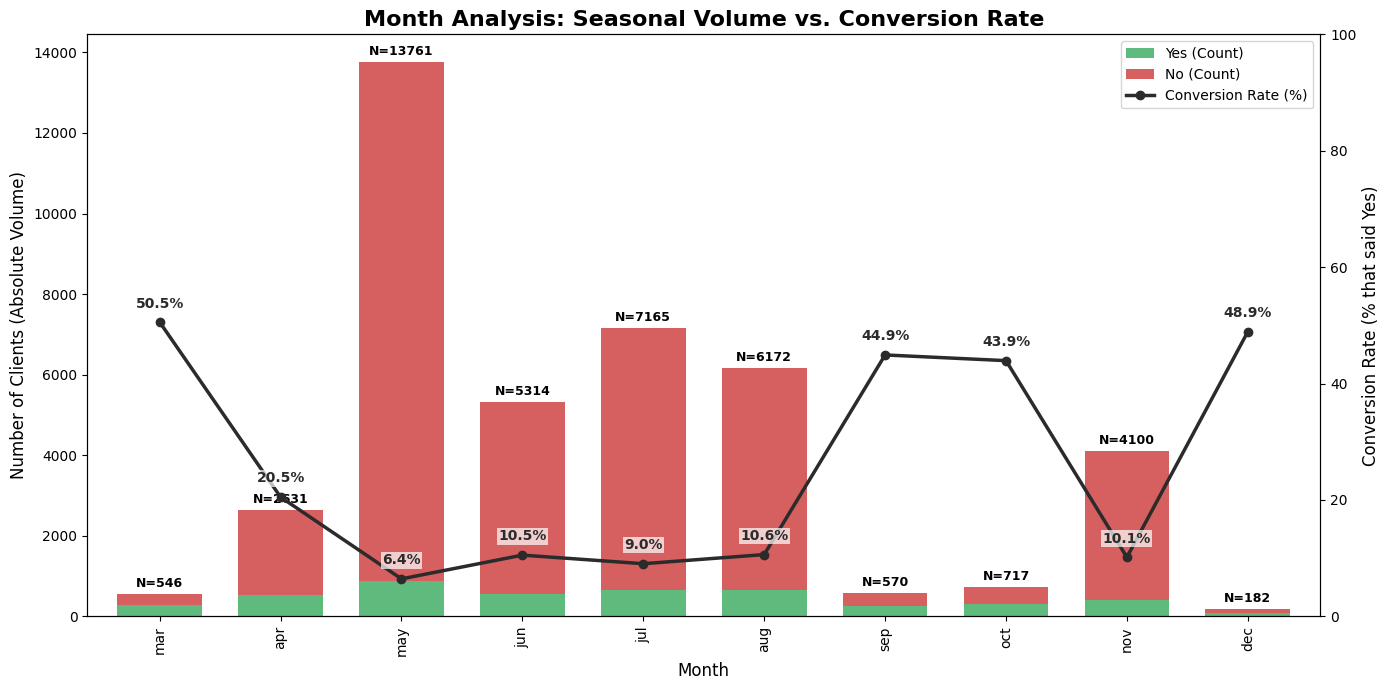

In [ ]:
# Grafik khusus untuk bulan karena dual axis
feature = 'month'
target = 'y'

# siapkan data
count_table = pd.crosstab(data_eda[feature], data_eda[target])
prop_table = pd.crosstab(data_eda[feature], data_eda[target], normalize='index') * 100

# urutkan data
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
existing_months = [m for m in month_order if m in count_table.index]

count_table = count_table.loc[existing_months]
prop_table = prop_table.loc[existing_months]

#plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# bar chart
count_table[['yes', 'no']].plot(kind='bar', stacked=True, ax=ax1,
                                color=['#5fba7d', '#d65f5f'], width=0.7)

# line chart (Conversion rate)
ax2 = ax1.twinx()
ax2.plot(range(len(count_table)), prop_table['yes'], color='#2b2b2b', marker='o',
         linewidth=2.5, linestyle='-', label='Conversion Rate (%)')

#Label
ax1.set_title(f'Month Analysis: Seasonal Volume vs. Conversion Rate', fontsize=16, fontweight='bold')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of Clients (Absolute Volume)', fontsize=12)
ax2.set_ylabel('Conversion Rate (% that said Yes)', fontsize=12)

# label lanjutan
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, ['Yes (Count)', 'No (Count)', 'Conversion Rate (%)'], loc='upper right')

# label buat bar
totals = count_table.sum(axis=1)
for i, v in enumerate(totals):
    ax1.text(i, v + 100, f"N={v}", ha='center', va='bottom', fontsize=9, fontweight='bold')

# label buat garis
for i, v in enumerate(prop_table['yes']):
    ax2.text(i, v + 2, f"{v:.1f}%", ha='center', va='bottom',
             color='#2b2b2b', fontweight='bold', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Presentase untuk conversion rate (karena harus 0-100%)
ax2.set_ylim(0, 100)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Kesimpulan

## Identifikasi Awal feature yang memiliki Korelasi paling tinggi terhadap Target

Berdasarkan hasil analisis dari uji kategorik dengan menggunakan Chi-Square pada data target maka dihasilkan beberapa observasi dari hipotesis, diantaranya adalah sebagai berikut:

1. **Pekerjaan, Kontak, Bulan dan Hasil kampanye sebelumnya**

    Berdasarkan hasil analisis Chi-Square hasil kampanye sebelumnya menjadi salah satu variable yang memiliki kekuatan untuk memprediksi hasil apakah seseorang akan melakukan deposit atau tidak. Hal ini dapat dipahami karena masyarakat yang telah menggunakan produk PortBank sudah familiar dan puas dengan performa dari produk yang mereka gunakan tersebut. Hal ini menyebabkan mereka lebih receptive terhadap produk Deposito

    Variable lainnya yang memengaruhi setelah pendidikan adalah bulan melakukan deposit. Ada hal tersembunyi yang tidak terlihat jika tidak melihat data secara lebih cermat. Bulan-bulan dimana tingkat konversi rendah, justru memiliki nilai absolut tertinggi. Hal ini bisa dilihat sebagai keadaan dimana agen-agen kewalahan dikarenakan harus menelepon calon nasabah dalam jumlah yang terlalu banyak. Di bulan dimana jumlah nasabah yang dihubungi lebih sedikit, tingkat konversi meningkat drastis
    
    Pekerjaan dan bulan juga memiliki hubungan signifikan. Pekerjaan memiliki hubungan yang signifikan juga dengan kemungkinan melakukan deposit. Pekerjaan seseorang secara langsung menentukan seberapa banyak disposable income yang bisa dikeluarkan oleh seseorang untuk kebutuhan investasi jangka panjang.
  
2. **Sejarah Gagal Bayar, Marital, Hari dihubungi, Pendidikan**

    Pendidikan memiliki pengaruh yang signifikan tapi tidak sekuat variable lainnya, hal ini dapat dijelaskan bahwa calon nasabah yang memiliki pendidikan lebih tinggi lebih familiar dengan produk finansial.

    Variabel lain dengan faktor prediktif paling lemah adalah status pernikahan, sejarah gagal bayar dan hari apa dihubungi. Status pernikahan dapat dijelaskan bahwa nasabah yang sudah menikah memiliki prioritas atau kapasitas finansial yang berbeda dengan nasabah yang belum menikah.



###**Kesimpulan Awal untuk Eksplorasi Data**

Berdasarkan analisis ini saja, kita dapat menyimpulkan bahwa profil nasabah (pendidikan, status kredit), konteks kampanye (bulan, hasil sebelumnya, durasi telepon), dan kondisi ekonomi makro semuanya memainkan peran penting dalam keberhasilan kampanye telemarketing ini. Untuk mendapatkan analisis yang lebih akurat mengenai hubungan interaksi *antar* variable maka perlu dilakukan analisis Machine Learning lanjutan. Melihat korelasi yang kuat antara durasi dengan target variable maka penelitian ini akan melakukan scaling untuk mencegah ada nya leakage pada data training dan test

# Feature Engineering

In [ ]:
## feature engenering untuk eda
feature_engineering = data_eda.copy()
#beban pinjaman
feature_engineering['loan_burden'] = ((feature_engineering['housing'] == 'yes') & (feature_engineering['loan'] == 'yes')).astype(int) # nasabah yang memiliki 2 beban pinjaman
#stabilitas ekonomi
feature_engineering['economic_stability'] = feature_engineering['emp.var.rate'] + feature_engineering['cons.conf.idx'] ## Indikator stabilitas makro ekonomi pada suatu negara
#total panggilan sebelum dan sesudah kampanye
feature_engineering['contact_count'] = feature_engineering['previous'] + feature_engineering['campaign'] ## total jumlah panggilan atau interaksi dengan pelanggan, baik pada kampanye saat ini maupun kampanye sebelumnya
#grouping usia
bins = [16, 25, 35, 50, 98]  # perhatikan: batas bawah mulai dari 16 agar usia 17 masuk
labels = ["Muda", "Dewasa Muda", "Dewasa", "Lansia"]
feature_engineering["age_group"] = pd.cut(feature_engineering["age"], bins=bins, labels=labels, include_lowest=True).astype(str)# membuat group bedasarkan umur
#groping bulan menjadi season
month_to_season = {
    "mar":"spring","apr":"spring","may":"spring",
    "jun":"summer","jul":"summer","aug":"summer",
    "sep":"fall","oct":"fall","nov":"fall",
    "dec":"winter","jan":"winter","feb":"winter"
}
feature_engineering["season"] = feature_engineering["month"].map(month_to_season) # membuat season bedasarkan bulan
#mengelompokan selain value:999 yes dan 999:no dikarenakan di penjelasan datanya(kagle) value 999 : belum pernah di contact/dihubungi
feature_engineering['pdays_group'] = feature_engineering['pdays'].apply(lambda x: 'No' if x == 999 else 'Yes')


# untuk mengecek column yang ditambahkan
feature_engineering[['loan_burden', 'economic_stability', 'contact_count', 'age_group', 'season', 'pdays_group']]

,loan_burden,economic_stability,contact_count,age_group,season,pdays_group
0,0,-35.3,1,Lansia,spring,No
1,0,-35.3,1,Lansia,spring,No
2,0,-35.3,1,Dewasa,spring,No
3,0,-35.3,1,Dewasa,spring,No
4,0,-35.3,1,Lansia,spring,No
...,...,...,...,...,...,...
41153,0,-51.9,1,Lansia,fall,No
41154,0,-51.9,1,Dewasa,fall,No
41155,0,-51.9,2,Lansia,fall,No
41156,0,-51.9,1,Dewasa,fall,No


Feature engineering dalam dataset di atas diambil dari sumber tabel dibawah.
Penambahan feature "loan_burden", "economic_stability", "contact_count", "age_group", dan "season" dijelaskan lebih lanjut di tabel

| Fitur Baru               | Dasar Konseptual / Referensi                                                                                                                                                                                                                                                                                                                    | Penjelasan Kenapa Fitur Ini Relevan                                                                                                                                                                         |
| ------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`loan_burden`**        | Berdasarkan literatur tentang **financial stress dan over-indebtedness** — kombinasi antara *housing loan* dan *personal loan* menunjukkan beban keuangan tinggi yang dapat memengaruhi keputusan investasi.  <br>📖 *Brown, S., & Taylor, K. (2008). Household debt and financial stress: Evidence from British panel data. Economic Journal.* | Nasabah dengan dua pinjaman (rumah & pribadi) cenderung lebih berhati-hati dalam mengambil produk keuangan baru. Fitur ini bisa membantu model menangkap risiko atau sikap konservatif pelanggan.           |
| **`economic_stability`** | Berdasarkan indikator makroekonomi dari studi Bank Marketing original.  <br>📖 *Moro, S., Cortez, P., & Rita, P. (2014). A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, 62, 22–31.*                                                                                                             | Penelitian tersebut menunjukkan bahwa `emp.var.rate` dan `cons.conf.idx` merupakan indikator utama kondisi ekonomi. Menjumlahkannya menjadi indeks gabungan memberikan estimasi tingkat stabilitas ekonomi. |
| **`contact_count`**      | Konsep dari *customer engagement* dan *marketing exposure frequency*.  <br>📖 *Berger, J., & Milkman, K. L. (2012). What makes online content viral? Journal of Marketing Research.*                                                                                                                                                            | Jumlah total kontak (kampanye sekarang + sebelumnya) menggambarkan seberapa sering pelanggan dihubungi — terlalu sering bisa menimbulkan kelelahan, terlalu jarang bisa kurang efektif.                     |
| **`age_group`**          | Berdasarkan teori segmentasi demografis dalam marketing.  <br>📖 *Kotler, P., & Keller, K. L. (2016). Marketing Management (15th ed.).*                                                                                                                                                                                                         | Segmentasi umur digunakan untuk memahami perilaku konsumen yang berbeda menurut tahapan hidup (young adults, mature adults, seniors).                                                                       |
| **`season`**             | Berdasarkan analisis temporal yang sering digunakan dalam penelitian kampanye bank.  <br>📖 *Moro et al. (2014)* juga meneliti efek bulan terhadap keberhasilan kampanye.                                                                                                                                                                       | Mengelompokkan bulan menjadi musim membantu menangkap pola musiman (misal musim panas lebih aktif karena liburan).                                                                                          |
| **`pdays_group`**        | Berdasarkan definisi resmi dari variabel `pdays` di UCI dataset: `999` berarti *tidak pernah dihubungi sebelumnya*.  <br>📖 *UCI Bank Marketing Dataset Documentation.*                                                                                                                                                                         | Mengubahnya menjadi kategori `Yes/No` lebih intuitif dan mempermudah model memahami status kontak sebelumnya.                                                                                               |


- Mengecek ulang jumlah data kategorik dan numerik setelah feature engeneering

In [ ]:
len(feature_engineering.select_dtypes(include='object').columns) # jumlah column kategorik

14

In [ ]:
len(feature_engineering.select_dtypes(include='number').columns) # jumlah column numerik

13

Terdapat penambahan 3 fitur numerik dan 3 fitur kategorik ke dataset

# Prepocesing machine learning

## Menentukan jenis encode yang tepat terhadap datanya utuk machine learning

- load data kategorik

In [ ]:
data_kategorik = feature_engineering.select_dtypes(include='object')
data_kategorik

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age_group,season,pdays_group
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,Lansia,spring,No
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,Lansia,spring,No
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,Dewasa,spring,No
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,Dewasa,spring,No
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,Lansia,spring,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41153,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,Lansia,fall,No
41154,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no,Dewasa,fall,No
41155,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no,Lansia,fall,No
41156,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes,Dewasa,fall,No


- jumlah group percolumn kategorik

In [ ]:
data_kategorik.nunique().sort_values(ascending=False)

,0
job,12
month,10
education,8
day_of_week,5
marital,4
season,4
age_group,4
loan,3
default,3
housing,3


- mencari column kategorik yang memliki value unknown untuk menentukan jenis encode yang tepat

In [ ]:
column_unknown = ['job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age_group', 'season',
       'pdays_group']

# mencari column kategorik yang memliki value unknown
column_unknown = data_eda[unknown].isin(['unknown']).any()
column_unknown


,0
education,True
default,True
housing,True
loan,True


Mencari column('education', 'housing', 'loan'), fungsinya untuk mengidentifikasi value unknown pada  column yang memiliki value berurutan seperti 'month' untuk menentukan jenis encode yang tepat. Dikarenakan education memiliki value Unknown dan tidak memiliki urutan seperti pendidikan standard di Indonesia (SD sd Kuliah) maka Education masuk ke One-Hot Encoding

Pembagian encoding sesuai typenya masing masing :

1.   One Hot = job, martial, education, default, housing, loan, contact, puotcome, pdays_group
2.   Ordinal = month, day_of_week, age_group, season

--------------------------------------------------------------------------------
*   One Hot digunakan pada kolom kategorik untuk diubah menjadi numerik.
*   Ordinal digunakan untuk mengurutkan urutan tertentu.





## Menentukan jenis Scaling yang tepat terhadap datanya untuk machine learning

pada data saat ini :     
- distribusi tidak normal
- beberapa memiliki outlier

jenis  scaling yang tepat adalah robust scaling

column yg akan di scaling : loan_burden,	economic_stability,	contact_count,age, duration, campaign, pdays, previous, emp.var.rate,
       cons.price.idx, cons.conf.idx, euribor3m, nr.employed

## Save data untuk machine learning

- mengubah value target 'yes': 1, 'no': 0

In [ ]:
data_ml = data_eda.copy() # supaya data original pada column target tidak berubah
data_ml['y'] = data_ml['y'].map({'yes': 1, 'no': 0}) # mengubah column y menjadi numerik  untuk melihat persebaran fitur terhadap target

In [ ]:
data_ml['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
41153,1
41154,0
41155,0
41156,1


- Save data_ml

In [ ]:
data_ml.to_csv('data_ml.csv', index=False)

# Machine Learning

## Pemilihan Model


Dalam proyek ini, kami membatasi pemilihan model pada beberapa algoritma yang representatif dan mudah diinterpretasikan, mencakup model sederhana, berbasis jarak, dan model ensemble. Model yang digunakan adalah:

1. **Logistic Regression — original model**

   - Dipilih karena sederhana, cepat, dan mudah diinterpretasikan.

   - Cocok sebagai baseline awal untuk klasifikasi nasabah potensial deposito.

2. **K-Nearest Neighbors Classifier (KNN) — original model**

   - Menggunakan pendekatan berbasis jarak untuk menentukan kelas nasabah.

   - Mampu menangkap pola non-linear sederhana tanpa memerlukan asumsi distribusi data.

3. **Decision Tree Classifier — tree-based model**

   - Memberikan interpretabilitas tinggi melalui struktur pohon keputusan.

   - Mampu menangkap interaksi antar fitur dan pola non-linear.

4. **Random Forest Classifier — bagging ensemble model**

   - Menggabungkan banyak decision tree untuk meningkatkan stabilitas dan akurasi.

   - Lebih tahan terhadap overfitting dibanding single decision tree.

   - Dapat menangani fitur dengan berbagai skala dan mendeteksi fitur penting dalam prediksi.

5. **XGBoost Classifier — boosting model**

   - Algoritma boosting yang sangat kuat dan populer untuk data tabular.

   - Efektif dalam menangani data tidak seimbang, missing values, serta interaksi fitur yang kompleks.

   - Sering menjadi model dengan performa terbaik pada kompetisi machine learning.

Alasan pemilihan model-model ini

   - Pendekatan ini memungkinkan kami membandingkan model dari berbagai kategori:

   - Model sederhana & interpretable: Logistic Regression, Decision Tree

   - Model berbasis instance / jarak: KNN

   - Model ensemble bagging: Random Forest

   - Model ensemble boosting: XGBoost

## Modeling Data Imbalanced: Pemilihan Metode Resampling Terbaik dengan Cross-Validation

In [2]:
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer

data_ml = pd.read_csv('data_ml.csv')

# ======================
# FEATURE ENGINEERING
# ======================
def feature_engineering(data_ml):
    data_ml = data_ml.copy()
    data_ml = data_ml.drop(columns=[col for col in ['index','level_0'] if col in data_ml.columns])

    data_ml['loan_burden'] = ((data_ml['housing']=='yes') & (data_ml['loan']=='yes')).astype(int)
    data_ml['economic_stability'] = data_ml['emp.var.rate'] + data_ml['cons.conf.idx']
    data_ml['contact_count'] = data_ml['previous'] + data_ml['campaign']

    # age group
    bins = [16,25,35,50,98]
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml['age_group'] = pd.cut(data_ml['age'], bins=bins, labels=labels, include_lowest=True).astype(str)

    # season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml['season'] = data_ml['month'].str.lower().map(month_to_season)

    # pdays
    data_ml['pdays_group'] = data_ml['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')

    return data_ml


# ======================
# PREPROCESSOR
# ======================
onehot_cols = ['job','marital','education', 'default','housing','loan','contact','poutcome','pdays_group']
ordinal_cols = ['age_group','season','month','day_of_week']
num_cols = ['loan_burden', 'economic_stability', 'contact_count','age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols),
    ('robust', RobustScaler(), num_cols)
], remainder='passthrough')


# ======================
# DATA SPLIT
# ======================
X = data_ml.drop(['y', 'duration'], axis=1)
y = data_ml['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)


# ======================
# MODEL + RESAMPLING SETUP
# ======================
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

resamplers = {
    'Random UnderSampling': RandomUnderSampler(random_state=42),
    'Random OverSampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f2_scorer = make_scorer(fbeta_score, beta=2)


# ======================
# CROSS-VALIDATION
# ======================
results = []

for resample_name, resampler in resamplers.items():
    for model_name, model in models.items():

        steps = [
            ('feature_eng', FunctionTransformer(feature_engineering)),
            ('preprocess', preprocessor),
        ]

        if resampler is not None:
            steps.append(('resample', resampler))

        steps.append(('model', model))

        pipeline = Pipeline(steps)

        scores = cross_val_score(pipeline, X_train, y_train,
                                 scoring=f2_scorer, cv=cv, n_jobs=-1)

        results.append({
            'Resampling': resample_name,
            'Model': model_name,
            'Mean F2': float(f"{scores.mean():.4f}"),
            'Std F2': float(f"{scores.std():.4f}"),
            'Fold Scores': [float(f"{s:.4f}") for s in scores]
        })


results_df = pd.DataFrame(results)
result_df = results_df.sort_values(by='Mean F2', ascending=False)
result_df

,Resampling,Model,Mean F2,Std F2,Fold Scores
5,Random OverSampling,Logistic Regression,0.5327,0.0077,"[0.5439, 0.5225, 0.5301, 0.5388, 0.5281]"
0,Random UnderSampling,Logistic Regression,0.5324,0.0095,"[0.5464, 0.5199, 0.5272, 0.5399, 0.5287]"
10,SMOTE,Logistic Regression,0.5324,0.0085,"[0.5431, 0.5207, 0.5283, 0.5412, 0.5287]"
3,Random UnderSampling,Random Forest,0.5315,0.0112,"[0.5244, 0.5144, 0.5353, 0.5359, 0.5475]"
4,Random UnderSampling,XGBoost,0.5237,0.0105,"[0.5368, 0.5069, 0.5308, 0.5267, 0.5174]"
9,Random OverSampling,XGBoost,0.5107,0.0052,"[0.5131, 0.5102, 0.5047, 0.5191, 0.5061]"
1,Random UnderSampling,KNN,0.4989,0.0113,"[0.5098, 0.4775, 0.4991, 0.5059, 0.5023]"
11,SMOTE,KNN,0.4627,0.0112,"[0.472, 0.4416, 0.4693, 0.4607, 0.47]"
6,Random OverSampling,KNN,0.4497,0.0095,"[0.4558, 0.4414, 0.4422, 0.4434, 0.4656]"
2,Random UnderSampling,Decision Tree,0.4435,0.0110,"[0.4641, 0.4427, 0.4346, 0.4425, 0.4335]"


Insight pemilihan metode resampling dengan crossvalidation pada k3 2 model (Knn & Xg-boost)

-  resampling terbaik -> random oversampling
-  model terbaik -> Logistic Regression
-  mean fold(f2 score) -> 0.5327
-  std antara fold(f2 score) ->0.0077


## Modeling Best model "Logistic Regression" (parameter sebelum dituning)   

In [3]:
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer


data_ml = pd.read_csv('data_ml.csv')

# =========================
# FEATURE ENGINEERING
# =========================
def feature_engineering(data):
    data = data.copy()
    data = data.drop(columns=[col for col in ['index', 'level_0'] if col in data.columns])

    data['loan_burden'] = ((data['housing']=='yes') & (data['loan']=='yes')).astype(int)
    data['economic_stability'] = data['emp.var.rate'] + data['cons.conf.idx']
    data['contact_count'] = data['previous'] + data['campaign']

    bins = [16,25,35,50,98]
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True).astype(str)

    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data['season'] = data['month'].str.lower().map(month_to_season)

    data['pdays_group'] = data['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')

    return data


# ======================
# PREPROCESSOR
# ======================
onehot_cols = ['job','marital','education', 'default','housing','loan','contact','poutcome','pdays_group']
ordinal_cols = ['age_group','season','month','day_of_week']
num_cols = ['loan_burden', 'economic_stability', 'contact_count','age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols),
    ('robust', RobustScaler(), num_cols)
], remainder='passthrough')



# =========================
# TRAIN TEST SPLIT
# =========================
X = data_ml.drop(['y','duration'], axis=1)
y = data_ml['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)


pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),
    ('preprocessor', preprocessor),
    ('resample', RandomOverSampler(random_state=42)),
    ('model', LogisticRegression(random_state=42))
])


# =========================
# FIT MODEL
# =========================
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# =========================
# EVALUASI
# =========================

acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f2_train = fbeta_score(y_train, y_train_pred, beta=2)

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)

model_results = [{
    'Dataset': 'Logistik Regression Train',
    'Recall': rec_train,
    'Precision': prec_train,
    'F2': f2_train,
},{
    'Dataset': 'Logistik Regression Test',
    'Recall': rec_test,
    'Precision': prec_test,
    'F2': f2_test
}]

results_data = pd.DataFrame(model_results).T
results_data


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0,1
Dataset,Logistik Regression Train,Logistik Regression Test
Recall,0.668822,0.66056
Precision,0.298461,0.295137
F2,0.535838,0.529452


insight :   
antara train dan test f2 score tidak mengalami over fitting dengan selisih 0.4%

### Confusion Matrik

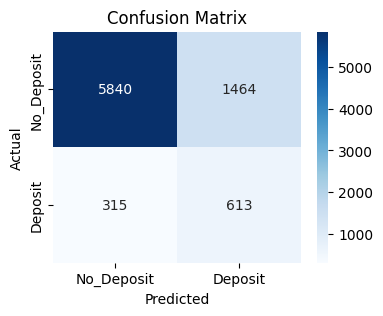

In [4]:
from sklearn.metrics import recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (Opsional) Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No_Deposit', 'Deposit'], yticklabels=['No_Deposit', 'Deposit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter tuning Logistic Regression

| **Parameter**         | **Default Value** | **Keterangan**                                                                                                 |
| --------------------- | ----------------- | -------------------------------------------------------------------------------------------------------------- |
| **penalty**           | `'l2'`            | Jenis regularisasi, bisa `'l1'`, `'l2'`, `'elasticnet'`, atau `None`.                                          |
| **dual**              | `False`           | Menggunakan formulasi *dual* (hanya untuk solver `'liblinear'` dan penalty `'l2'`). Cocok untuk fitur sedikit. |
| **tol**               | `1e-4`            | Toleransi untuk *stopping criteria*. Semakin besar → lebih cepat berhenti.                                     |
| **C**                 | `1.0`             |  regulasi yang mengontrol seberapa kuat model diberi hukuman (penalti) supaya tidak overfitting.. **Semakin kecil C → regulasi semakin kuat**.                             |
| **fit_intercept**     | `True`            | Menambahkan intercept/bias dalam model.                                                                        |
| **intercept_scaling** | `1`               | Dipakai jika `solver='liblinear'` dan `fit_intercept=True`.                                                    |
| **class_weight**      | `None`            | Mengatur bobot kelas (contoh: `'balanced'` untuk menangani imbalance).                                         |
| **random_state**      | `None`            | Memastikan hasil reproduktif.                                                                                  |
| **solver**            | `'lbfgs'`         | Algoritma optimisasi: `'lbfgs'`, `'liblinear'`, `'saga'`, `'newton-cg'`, `'sag'`.                              |
| **max_iter**          | `100`             | Iterasi maksimum sampai konvergen.                                                                             |
| **multi_class**       | `'auto'`          | Strategi multikelas: `'ovr'` atau `'multinomial'`.                                                             |
| **verbose**           | `0`               | Menampilkan log proses jika > 0.                                                                               |
| **warm_start**        | `False`           | Jika `True`, proses training menggunakan solusi sebelumnya.                                                    |
| **n_jobs**            | `None`            | Paralelisasi (berfungsi pada solver `'liblinear'`, `'lbfgs'`, `'newton-cg'`, `'sag'`).                         |
| **l1_ratio**          | `None`            | Digunakan *hanya jika* `penalty='elasticnet'`.                                                                 |


4 parameter penting
| Parameter    | Perlu dituning?  | Kenapa?                                   |
| ------------ | ---------------- | ----------------------------------------- |
| C            | ✔ Sangat penting | Mengatur regularisasi                     |
| penalty      | ✔ Penting        | Pengaruh besar pada model sparse vs dense |
| solver       | ✔ Penting        | Tergantung penalty                        |
| class_weight | ✔ Penting        | Menangani imbalance                       |


diatas adalah 4 parameter terpenting logistic regression karena penanganan imbalance sudah ditangani menggunakan Random Oversampler(best parameter) maka class_weight tidak di tuning

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Scorer F2
f2_scorer = make_scorer(fbeta_score, beta=2)

pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),
    ('preprocessor', preprocessor),
    ('over', RandomOverSampler(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],

    # Kombinasi penalty–solver yang valid
    'classifier__penalty': ['l2', 'l1'],
    'classifier__solver': ['liblinear', 'saga'],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F2 score:", grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best F2 score: 0.5371912189387807


Insight :    
setelah melakukan hyperparameter tuning dengan 4 parameter, kita mendapatkan parameter terbaik dengan menggunakan grid search ( C = 10, penalty = 'l1', solver = 'liblinear')  dengan f2 score : 0.5371

## modeling(Logistic Regression) dengan cross validation dan parameter terbaik

In [7]:
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# ======================
# FEATURE ENGINEERING
# ======================
def feature_engineering(data_ml):
    data_ml = data_ml.copy()
    data_ml = data_ml.drop(columns=[col for col in ['index','level_0'] if col in data_ml.columns])

    data_ml['loan_burden'] = ((data_ml['housing']=='yes') & (data_ml['loan']=='yes')).astype(int)
    data_ml['economic_stability'] = data_ml['emp.var.rate'] + data_ml['cons.conf.idx']
    data_ml['contact_count'] = data_ml['previous'] + data_ml['campaign']

    # age group
    bins = [16,25,35,50,98]
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data_ml['age_group'] = pd.cut(data_ml['age'], bins=bins, labels=labels, include_lowest=True).astype(str)

    # season
    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data_ml['season'] = data_ml['month'].str.lower().map(month_to_season)

    # pdays
    data_ml['pdays_group'] = data_ml['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')

    return data_ml


# ======================
# PREPROCESSOR
# ======================
onehot_cols = ['job','marital','education', 'default','housing','loan','contact','poutcome','pdays_group']
ordinal_cols = ['age_group','season','month','day_of_week']
num_cols = ['loan_burden', 'economic_stability', 'contact_count','age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols),
    ('robust', RobustScaler(), num_cols)
], remainder='passthrough')


# ======================
# DATA SPLIT
# ======================
X = data_ml.drop(['y', 'duration'], axis=1)
y = data_ml['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f2_scorer = make_scorer(fbeta_score, beta=2)

# ======================
# BEST PARAMETER LOGISTIC REGRESSION
# ======================
best_logreg = LogisticRegression(
    C=10,
    penalty='l1',
    solver='liblinear',
    random_state=42
)

# ======================
# PIPELINE BEST MODEL
# ======================
best_pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),
    ('preprocess', preprocessor),
    ('resample', RandomOverSampler(random_state=42)),
    ('model', best_logreg)
])

# ======================
# CROSS-VAL F2
# ======================
scores = cross_val_score(
    best_pipeline,
    X_train,
    y_train,
    scoring=f2_scorer,
    cv=cv,
    n_jobs=-1
)

# ======================
# BUAT TABEL HASILNYA
# ======================
best_result_df = pd.DataFrame([{
    "Model": "Logistic Regression (Best Params)",
    "Resampling": "Random OverSampling",
    "C": 10,
    "Penalty": "l1",
    "Solver": "liblinear",
    "Mean F2": scores.mean(),
    "Std F2": scores.std(),
    'Fold Scores': [float(f"{s:.4f}") for s in scores]
}])

best_result_df


,Model,Resampling,C,Penalty,Solver,Mean F2,Std F2,Fold Scores
0,Logistic Regression (Best Params),Random OverSampling,10,l1,liblinear,0.53725,0.010862,"[0.5527, 0.5192, 0.5418, 0.5351, 0.5374]"


Insight :
- remodeling dengan best resampling : Over sampler ( random oversampler ) dengan mean ke-5 fold (Mean f2 : 0.53725 dan std f2) : 0.010862
- best parameter C=10, penalty='l1', solver='liblinear'

### Idetifikasi over/under fitting

In [1]:
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer



data_ml = pd.read_csv('data_ml.csv')

# =========================
# FEATURE ENGINEERING
# =========================
def feature_engineering(data):
    data = data.copy()
    data = data.drop(columns=[col for col in ['index', 'level_0'] if col in data.columns])

    data['loan_burden'] = ((data['housing']=='yes') & (data['loan']=='yes')).astype(int)
    data['economic_stability'] = data['emp.var.rate'] + data['cons.conf.idx']
    data['contact_count'] = data['previous'] + data['campaign']

    bins = [16,25,35,50,98]
    labels = ["Muda","Dewasa Muda","Dewasa","Lansia"]
    data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True).astype(str)

    month_to_season = {
        "mar":"spring","apr":"spring","may":"spring",
        "jun":"summer","jul":"summer","aug":"summer",
        "sep":"fall","oct":"fall","nov":"fall",
        "dec":"winter","jan":"winter","feb":"winter"
    }
    data['season'] = data['month'].str.lower().map(month_to_season)

    data['pdays_group'] = data['pdays'].apply(lambda x: 'No' if x==999 else 'Yes')

    return data


# ======================
# PREPROCESSOR
# ======================
onehot_cols = ['job','marital','education', 'default','housing','loan','contact','poutcome','pdays_group']
ordinal_cols = ['age_group','season','month','day_of_week']
num_cols = ['loan_burden', 'economic_stability', 'contact_count','age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_cols),
    ('ordinal', OrdinalEncoder(), ordinal_cols),
    ('robust', RobustScaler(), num_cols)
], remainder='passthrough')


# =========================
# TRAIN TEST SPLIT
# =========================
X = data_ml.drop(['y','duration'], axis=1)
y = data_ml['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)


# =========================
# BEST LOGISTIC REGRESSION
# =========================
best_logreg = LogisticRegression(
    C=10,
    penalty='l1',
    solver='liblinear',
    random_state=42
)


pipeline = Pipeline([
    ('feature_eng', FunctionTransformer(feature_engineering)),
    ('preprocessor', preprocessor),
    ('resample', RandomOverSampler(random_state=42)),
    ('model', best_logreg)
])


# =========================
# FIT MODEL
# =========================
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# =========================
# EVALUASI
# =========================

acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
f2_train = fbeta_score(y_train, y_train_pred, beta=2)

acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)

model_results = [{
    'Dataset': 'Logistik Regression Train',
    'Recall': rec_train,
    'Precision': prec_train,
    'F2': f2_train,
},{
    'Dataset': 'Logistik Regression Test',
    'Recall': rec_test,
    'Precision': prec_test,
    'F2': f2_test
}]

results_data = pd.DataFrame(model_results).T
results_data


,0,1
Dataset,Logistik Regression Train,Logistik Regression Test
Recall,0.648073,0.642241
Precision,0.325264,0.322162
F2,0.540741,0.535778


- model Logistik Regression tidak mengalami over fitting bisa di identifikasi f2 score train : 0.540741 dan f2 score test : 0.535778
 hanya berbeda 0.005% antara f2 score train dan test, masih di bawah 10% yang mengidentifikasi model over fitting

### target dan Cara Kerja Model Logistic Regression

1. Hitung kombinasi linear dari fitur

    - Model menjumlahkan semua fitur × koefisiennya.

2. Masukkan z ke fungsi sigmoid

    - Sigmoid mengubah nilai z → probabilitas 0–1.

3. Probabilitas diubah jadi keputusan, Jika:

    - p ≥ 0.5 → Deposit

    - p < 0.5 → Tidak deposit

4. Model belajar dengan meminimalkan error

    - Model memperbaiki koefisien lewat gradient descent untuk menurunkan log-loss.

5. Koefisien memberi insight

    - Koefisien positif → menaikkan peluang deposit

    - Koefisien negatif → menurunkan peluang deposit

- Ilustrasi model Logistic regreesion bekerja

### Metrik evaluation (Confusion Metrik)

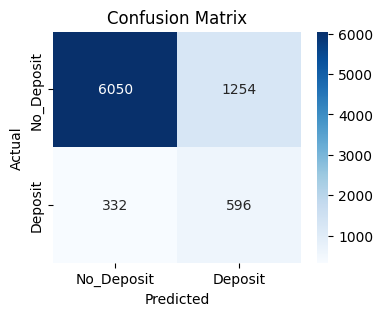

In [9]:
from sklearn.metrics import recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (Opsional) Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No_Deposit', 'Deposit'], yticklabels=['No_Deposit', 'Deposit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Dari grafik diatas kita bisa simpulkan

- TN (True Negative): 6050 nasabah yang diprediksi tidak deposit dan memang tidak deposit

- FP (False Positive): 1254 nasabah yang diprediksi deposit, padahal tidak

- FN (False Negative): 332 nasabah yang diprediksi tidak deposit, padahal sebenarnya deposit

- TP (True Positive): 596 nasabah yang diprediksi deposit dan memang deposit


Catatan tambahan :  

**Biaya telpon**

Referensi Tarif Panggilan Roaming UE 2014

Di laman resmi UE — “Regulated roaming tariffs 2007–2016” — tercatat bahwa per 1 Juli 2014 tarif maksimum bagi panggilan suara saat roaming adalah €0.19 per menit (outgoing call)   

**Biaya Pekerja (Bulanan)**
Upah rata-rata di Portugal 2008–2010 berada di kisaran €1.240 per bulan (gross).

**Rata rata nasabah mendepositkan uang**
 €500 ( ini hanya asumsi)

**referensi suku bunga 2014**
Sumber: European Central Bank – HFCS Wave 2 (2014)

rata rata suku bunga pada data ini 3.62%(untuk nasabah) serta  kredit UMKM: 7%(product kredit bank) berarti keuntungan bank 7% - 3,62% = 3,38%


**Kurs Euro ke Rupiah pada 2014 l**
Menurut data historis, rata-rata kurs EUR → IDR pada 2014 ≈ €1 = Rp 15.776

- estimasi kerugian



dari total nasabah 6050+1254+332+596 = **8232**
- FN (False Negative): 332
    -  potensi kerugian pada pendapatan bunga €500 x 332 = € 166.000, lalu  € 166.000 x 3,38% = **€ 5.610** atau €5.610 x 15.776 = **Rp 88.500.000**
- FP (False Positive): 1254
    - potensi kerugian pada biaya marketing yang sia sia dan biaya tenaga kerja , misal panggilan telpn per nasabah rata rata **€ 0,19** serta rata-rata biaya pekerja** €5** per pegawai dan rata rata duration panggilan pada data ini adalah **258 detik/ 4menit** dibulatkan
    , jadi per nasabah 4 menit×0,19= **€0,76** dan total telp nasabah yang sia sia 1254×0,76= **€ 953** dan biaya gaji pegawai € 5 x 1254 = **€ 6.270**, € 953 + € 6.270 =  **€ 7.223**  atau dalam kurs rupiah € 7.223 × 15.776≈ **Rp 113.950.000**
      

jadi total kerugian  = € 5.610 + € 7.223 = **€ 12.833** atau € 12.833 × 15.776 = **Rp 202.453.000**

### Metrik Evaluation ( ROC & AUC )

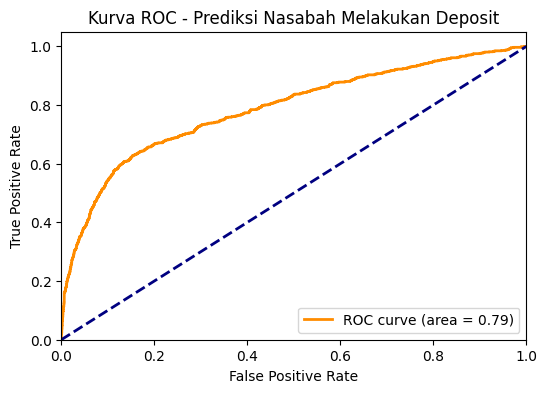

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Prediksi Nasabah Melakukan Deposit')
plt.legend(loc='lower right')
plt.show()


1. AUC (Area Under the Curve) = 0.79

    - Ini menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam     membedakan antara nasabah yang akan melakukan deposit dan yang tidak.

    - Nilai AUC berada pada skala 0–1, dan semakin mendekati 1, semakin baik    performa klasifikasi model.

    - AUC 0.79 berarti bahwa dalam 79% kasus, model dapat membedakan secara benar antara nasabah positif (akan deposit) dan negatif (tidak deposit).


| **Skor AUC** | **Kualitas Model**          | **Interpretasi**                          |
| ------------ | --------------------------- | ----------------------------------------- |
| 0.5          | **Random Guessing**         | Tidak lebih baik dari tebak-tebakan       |
| 0.6 – 0.7    | **Poor (Lemah)**            | Model kurang baik dalam klasifikasi       |
| 0.7 – 0.8    | **Fair (Cukup Baik)**       | Masih bisa diterima, tapi perlu perbaikan |
| 0.8 – 0.9    | **Good (Bagus)**            | Model cukup akurat dalam membedakan kelas |
| 0.9 – 1.0    | **Excellent (Sangat Baik)** | Model sangat akurat dan bisa diandalkan   |


## Threshold + Youden’s J Statistic (TPR – FPR)

In [11]:
import numpy as np

j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]

print("Threshold terbaik :", best_threshold)
print("Youden's J Score :", j_scores[best_idx])


Threshold terbaik : 0.5215559670276863
Youden's J Score : 0.47422527098991585


- grafik

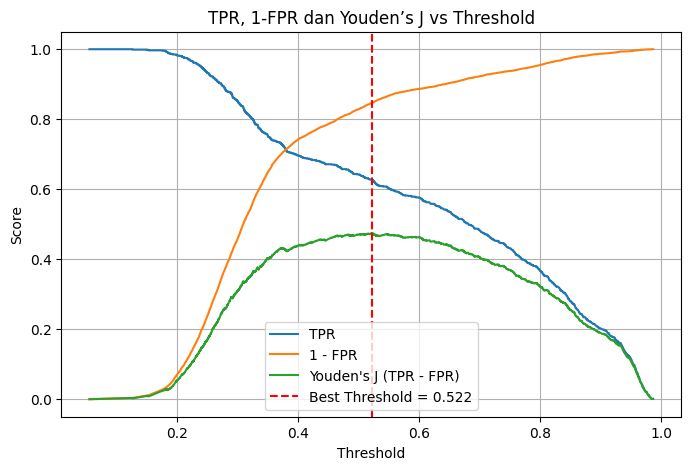

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

y_score = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Hitung Youden's J
j_scores = tpr - fpr

plt.figure(figsize=(8,5))
plt.plot(thresholds, tpr, label="TPR")
plt.plot(thresholds, 1 - fpr, label="1 - FPR")
plt.plot(thresholds, j_scores, label="Youden's J (TPR - FPR)")
plt.axvline(thresholds[np.argmax(j_scores)], color='red', linestyle='--',
            label=f"Best Threshold = {thresholds[np.argmax(j_scores)]:.3f}")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("TPR, 1-FPR dan Youden’s J vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


### Feature Importance

In [14]:
# Pastikan pipeline sudah fit
pipeline.fit(X_train, y_train)

# Ambil koefisien dari Logistic Regression
coef = pipeline.named_steps['model'].coef_[0]

# Ambil nama fitur setelah preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Buat DataFrame
import pandas as pd
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': coef
}).sort_values(by='importance', key=abs, ascending=False)

print(feature_importance_df)

                                  feature  importance
42                   robust__emp.var.rate   -2.517413
45                      robust__euribor3m    2.273833
22                    onehot__default_yes   -1.987339
46                    robust__nr.employed   -1.395021
43                 robust__cons.price.idx    0.667719
13                onehot__marital_unknown    0.664332
27              onehot__contact_telephone   -0.653477
29               onehot__poutcome_success    0.616359
44                  robust__cons.conf.idx    0.508371
36             robust__economic_stability   -0.492921
28           onehot__poutcome_nonexistent    0.370348
7                     onehot__job_student    0.306546
4                     onehot__job_retired    0.304469
21                onehot__default_unknown   -0.256915
2                   onehot__job_housemaid   -0.187914
14             onehot__education_basic.6y    0.175506
32                        ordinal__season    0.162698
12                 onehot__m

/tmp/ipython-input-1548428177.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


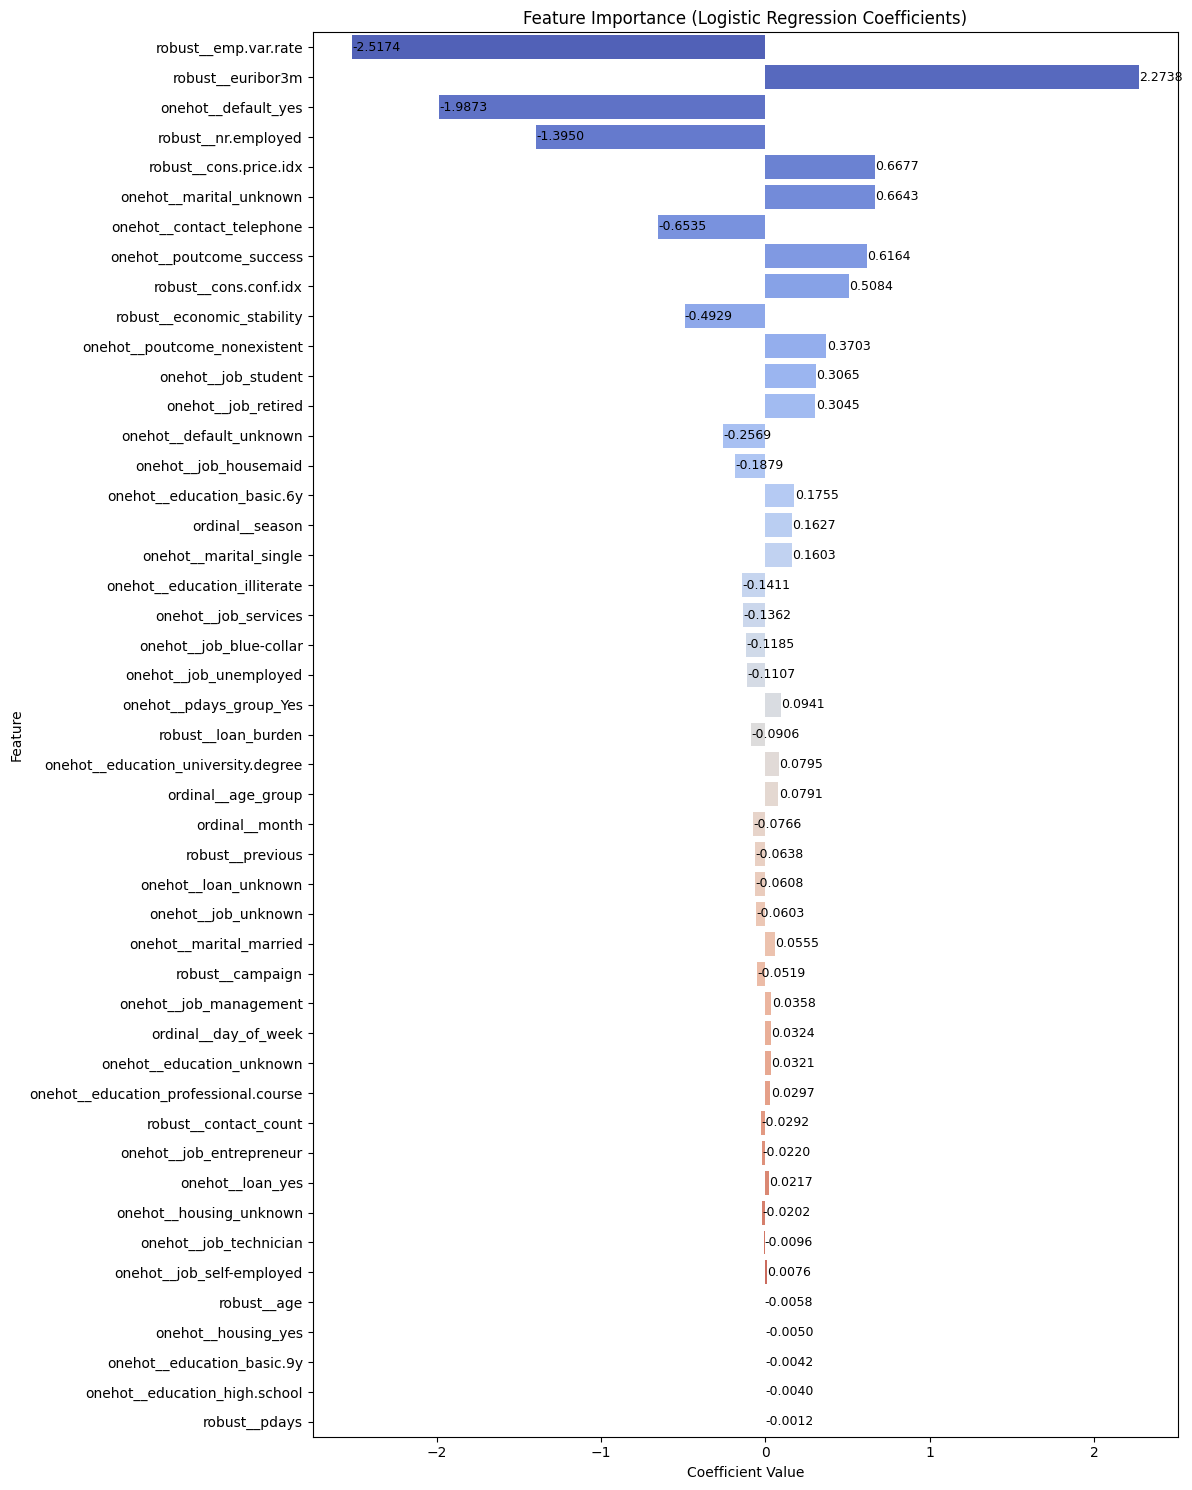

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Urutkan berdasarkan absolute importance
feature_importance_df_sorted = feature_importance_df.sort_values(
    by="importance", key=abs, ascending=False
)

plt.figure(figsize=(12, 15))
ax = sns.barplot(
    x="importance",
    y="feature",
    data=feature_importance_df_sorted,
    palette="coolwarm"
)

# Tambahkan nilai koefisien di ujung bar
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(
        width + 0.002,
        y,
        f"{width:.4f}",
        va="center",
        fontsize=9
    )

plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


insight feature Importance

top 5 fitur yang sangat mempengaruhi model :    

 - emp.var.rate (−2.51)
Nilai yang rendah atau negatif menurunkan probabilitas deposit,
 - euribor3m (+2.27)
suku bunga tinggi meningkatkan probabilitas deposit,
 - default_yes (−1.98)
Nasabah dengan status default memiliki kecenderungan jauh lebih rendah untuk membuka deposito.
 - nr.employed (−1.39)
kondisi ketenagakerjaan menurun nasabah memilih instrumen investasi lain atau konsumsi yang lebih tinggi.
 - cons.price.idx (+0.66)
CPI sedikit lebih tinggi selama periode kampanye dengan tingkat keberhasilan lebih baik


### Shap Grafik

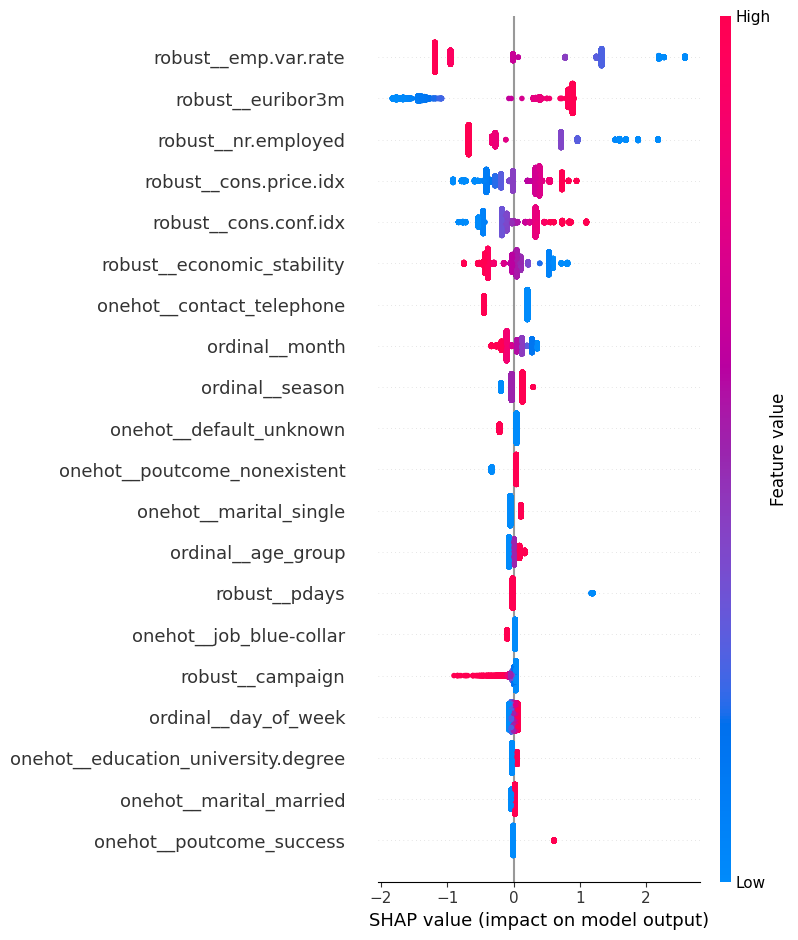

In [16]:
import shap
import pandas as pd

# 1. Jalankan feature engineering
X_test_fe = feature_engineering(X_test)

# 2. Transformasi data
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test_fe)

# 3. Ambil nama fitur output dari preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=X_test_fe.columns)

# 4. Buat DataFrame dari hasil transformasi dengan nama kolom yang benar
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# 5. Ambil model LogisticRegression dari pipeline
model = pipeline.named_steps['model']

# 6. Buat explainer SHAP
explainer = shap.Explainer(model, X_test_df)  # <-- gunakan DataFrame dengan nama kolom

# 7. Dapatkan SHAP values
shap_values = explainer(X_test_df)

# 8. Plot summary dengan nama fitur
shap.summary_plot(shap_values, X_test_df)


penjelasan :    
- Sumbu X (Horizontal): Nilai SHAP (impact terhadap prediksi). Semakin ke kanan, semakin mendorong prediksi ke arah deposit (kelas 1), dan ke kiri ke arah tidak deposit (kelas 0).

- Warna Titik:

    - Merah = nilai fitur tinggi

    - Biru = nilai fitur rendah


Insight dari grafik shap:
- emp.var.rate (negatif) → Saat indikator ekonomi melemah, nasabah lebih jarang membuka deposito karena pendapatan dan kemampuan menabung ikut menurun.
- euribor3m (positif) → Ketika suku bunga pasar naik, deposito menjadi lebih menarik sehingga peluang nasabah membuka deposito meningkat.
- nr.employed (negatif) → Penurunan jumlah pekerja menunjukkan kondisi ekonomi kurang baik. Pada situasi ini, nasabah cenderung menunda menabung atau memilih konsumsi daripada deposito.
- cons.price.idx (positif) → Pada periode dengan CPI yang lebih tinggi, kampanye deposito menunjukkan tingkat keberhasilan lebih baik.
- const.conf.idx (positif) → Ketika kepercayaan konsumen membaik (nilai CCI naik menuju 0, artinya lebih optimis), nasabah lebih cenderung membuka deposito.

# Kesimpulan dan Rekomendasi

## Kesimpulan

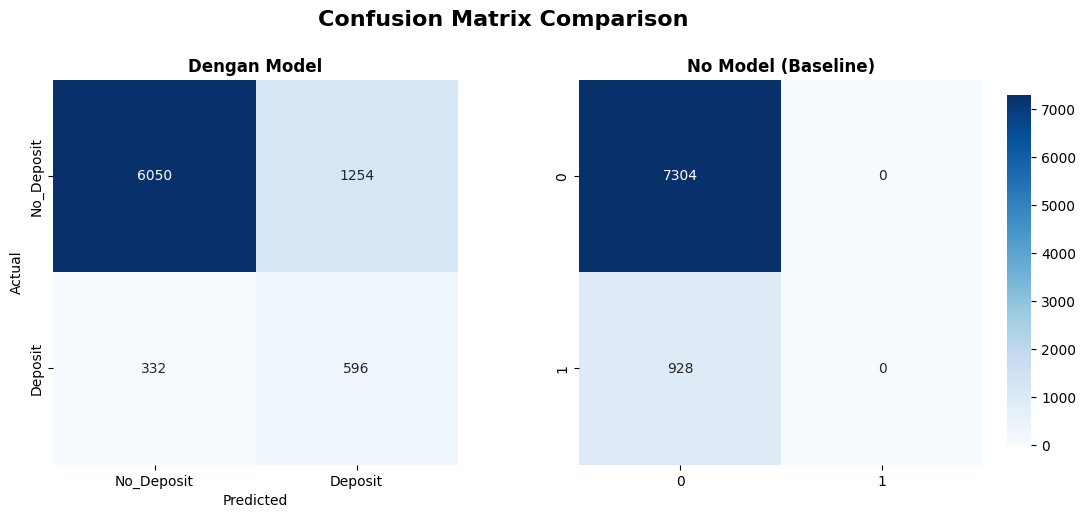

In [ ]:
# Matrix model
cm_model = confusion_matrix(y_test, y_test_pred)

# Baseline "No Model" Matrix (kanan)
if isinstance(y_test, (pd.Series, pd.DataFrame)):
    # If pandas, use mode()
    majority_class = y_test.mode().iloc[0] if isinstance(y_test, pd.Series) else y_test.iloc[:,0].mode()[0]
    n_samples = len(y_test)
else:
    # If list/numpy, use unique counts
    vals, counts = np.unique(y_test, return_counts=True)
    majority_class = vals[np.argmax(counts)]
    n_samples = len(y_test)

y_pred_baseline = [majority_class] * n_samples
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

#Bandingkan
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Labels
labels = ['No_Deposit', 'Deposit']

# Left Plot: model
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            ax=axes[0], cbar=False)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Dengan Model', fontweight='bold')

# Right Plot: No Model (Baseline)
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            ax=axes[1], cbar=False)
axes[1].set_xlabel('Predicted (Baseline)')
axes[1].set_ylabel('') # biar rapih
axes[1].set_title('No Model (Baseline)', fontweight='bold')

# Warna sama
vmax_val = max(cm_model.max(), cm_baseline.max())
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sns.heatmap(cm_baseline, annot=False, fmt='d', cmap='Blues',
            ax=axes[1], cbar_ax=cbar_ax,
            vmin=0, vmax=vmax_val)

plt.suptitle("Confusion Matrix Comparison", fontsize=16, fontweight='bold', y=1.02)
plt.subplots_adjust(right=0.9, wspace=0.3)
plt.show()

Tanpa menggunakan model maka perusahaan berpotensi mengalami potensi kerugiaan sebesar  € 42,000. Hal ini didapat dari

Tanpa Model (semua calon nasabah kita telepon) :

*   Total Biaya Telp => 0.19 x € 0.19 = € 0.76
*   Biaya per customer (rata-rata)=> € 5.76
*   Total yang di hubungi 7,304
*   Biaya yang terbuang => € 5,76 x 7304 = € 42,000
*   Nasabah yang didapat 0

Dengan Model

*   Total Biaya Telp => 0.19 x € 0.19 = € 0.76
*   Biaya per customer (rata-rata)=> € 5.76
*   Total yang di hubungi 1,254
*   Biaya menghubungi => € 5,76 x 1,254 = € 7,223
*   Keuntungan per Nasabah => €500  x 3.38% = € 16,9
*   Nasabah yang didapat 332 => 332 x € 16,9 = € 5610,9

Total Penghematan = € 5,610 + € 7,223 =  € 12,833

Dibandingkan tanpa menggunakan model, Portbank dapat menghemat lebih dari 3x lipat jika menggunakan model

**Insight**

Beberapa Insight lain yang didapat dari penelitian ini:
1. Keadaan Makro Ekonomi memengaruhi keputusan seseorang melakukan deposit. Hal ini menunjukan karakteristik dari deposito sebagai safe haven
2. Nasabah yang sudah membeli produk Portbank dari kampanye sebelumnya akan lebih terbuka untuk membeli produk Portbank
3. Penggunaan model akan lebih menghemat biaya bagi PortBank karena dapat mengidentifikasi lebih akurat siapa saja yang akan melakukan deposit

## Rekomendasi



- Model Siap Produksi untuk Identifikasi Awal
Model yang sudah dibangun dapat digunakan sebagai alat bantu identifikasi awal untuk mempersingkat waktu dalam mencari nasabah dengan potensi melakukan deposit.
Namun, hasil prediksi tetap harus didukung oleh proses validasi dan tindak lanjut manual agar keputusan lebih akurat.

- Penambahan Jumlah Data Nasabah yang Melakukan Deposit
Untuk meningkatkan performa model di masa depan, sangat penting untuk menambah jumlah data khususnya pada nasabah yang melakukan deposit (kelas minoritas).
Penambahan data ini dapat membantu model mengenali pola nasabah deposit dengan lebih baik dan mengurangi bias akibat data imbalance.

- Penekanan pada Kualitas Input Data (Minimalkan Missing Value / Unknown)
Agar hasil analisis dan prediksi menjadi lebih akurat dan mudah diinterpretasikan, perlu ditekankan agar data input yang digunakan bebas dari missing value atau unknown terutama pada fitur-fitur yang memilki missing value sangat banyak seperti education, default, housing, dan loan.
Hal ini akan memudahkan analisis lanjutan.

- Fokus Client
Lebih fokuskan pada client yang memiliki potensi tinggi untuk deposit, seperti client yang telah menggunakan produk PortBank sebelumnya, client yang dihubungi dengan telepon Selular dan client dengan job Admin

- Pertimbangkan keadaan Ekonomi Makro
Pada keadaan ekonomi downturn, produk deposito lebih dipilih calon nasabah. Pada saat ekonomi ada di tahap ini, baiknya PortBank melakukan kampanye secara lebih masif baik telemarketing atau untuk meningkatkan Public Awareness agar produk deposito lebih dilirik

### Save ke joblib

In [2]:
import joblib

# Simpan model
joblib.dump(pipeline, 'best_model_pediksi_deposit.pkl', compress=3) #compress digunakan pada model ukuran besar tapi ini saya pakai hanya opsional agar tahu kegunaannya

# Muat model
model_load = joblib.load('best_model_pediksi_deposit.pkl')

# model siap prediksi
model_load.predict(X)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
import platform
print(platform.python_version())


3.12.12
